<a href="https://colab.research.google.com/github/pdeleonsoria/4GeeksAcademyPerfilPublico/blob/master/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils import estimator_html_repr
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/proyecto cancer/cancer_data_eng.csv", encoding='latin-1')
df.head()
df.columns


<ipython-input-88-43e302081fce>:1: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/proyecto cancer/cancer_data_eng.csv", encoding='latin-1')


Index(['Patient.Code', 'RCBP.Name', 'Gender', 'Date.of.Birth', 'Age',
       'Raca.Color', 'Nationality', 'Naturality.State', 'Naturality',
       'Degree.of.Education', 'State.Civil', 'Code.Profession',
       'Name.Occupation', 'Status.Address', 'City.Address',
       'Description.of.Topography', 'Topography.Code',
       'Morphology.Description', 'Code.of.Morphology',
       'Description.of.Disease', 'Illness.Code', 'Child.Illness.Description',
       'Child.Illness.Code', 'Youth.Adult.Illness.Description',
       'Code.of.Disease.Adult.Young.', 'Indicator.of.Rare.Case',
       'Diagnostic.means', 'Extension', 'Laterality', 'Statement', 'TNM',
       'Status.Vital', 'Type.of.Death', 'Date.of.Death',
       'Date.of.Last.Contact', 'Date.of.Diagnostic', 'Distant.metastasis',
       'year'],
      dtype='object')

In [ ]:
df.shape

(1778176, 38)

In [ ]:
df = df.rename(columns={'Patient.Code': 'Patient_Code',
                         'RCBP.Name': 'RCBP_Name',
                         'Date.of.Birth': 'Date_of_Birth',
                         'Raca.Color': 'Raca_Color',
                         'Naturality.State': 'Naturality_State',
                         'Degree.of.Education': 'Degree_of_Education',
                        'State.Civil' : 'State_Civil',
                         'Code.Profession': 'Code_Profession',
                         'Name.Occupation': 'Name_Occupation',
                         'Status.Address': 'Status_Address',
                         'City.Address': 'City_Address',
                         'Description.of.Topography': 'Description_of_Topography',
                         'Topography.Code': 'Topography_Code',
                         'Morphology.Description': 'Morphology_Description',
                         'Code.of.Morphology': 'Code_of_Morphology',
                         'Description.of.Disease': 'Description_of_Disease',
                         'Illness.Code': 'Illness_Code',
                         'Child.Illness.Description': 'Child_Illness_Description',
                         'Child.Illness.Code': 'Child_Illness_Code',
                         'Code.of.Disease.Adult.Young.': 'Code_of_Disease_Adult_Young',
                         'Youth.Adult.Illness.Description': 'Youth_Adult_Illness_Description',
                         'Indicator.of.Rare.Case': 'Indicator_of_Rare_Case',
                         'Diagnostic.means': 'Diagnostic_means',
                         'Status.Vital': 'Status_Vital',
                         'Type.of.Death': 'Type_of_Death',
                         'Date.of.Death': 'Date_of_Death',
                         'Date.of.Last.Contact': 'Date_of_Last_Contact',
                         'Date.of.Diagnostic': 'Date_of_Diagnostic',
                         'Distant.metastasis': 'Distant_metastasis'})


In [ ]:
df.columns

Index(['Patient_Code', 'RCBP_Name', 'Gender', 'Date_of_Birth', 'Age',
       'Raca_Color', 'Nationality', 'Naturality_State', 'Naturality',
       'Degree_of_Education', 'State_Civil', 'Code_Profession',
       'Name_Occupation', 'Status_Address', 'City_Address',
       'Description_of_Topography', 'Topography_Code',
       'Morphology_Description', 'Code_of_Morphology',
       'Description_of_Disease', 'Illness_Code', 'Child_Illness_Description',
       'Child_Illness_Code', 'Youth_Adult_Illness_Description',
       'Code_of_Disease_Adult_Young', 'Indicator_of_Rare_Case',
       'Diagnostic_means', 'Extension', 'Laterality', 'Statement', 'TNM',
       'Status_Vital', 'Type_of_Death', 'Date_of_Death',
       'Date_of_Last_Contact', 'Date_of_Diagnostic', 'Distant_metastasis',
       'year'],
      dtype='object')

In [ ]:
conn = sqlite3.connect('df_sql.db')
cursor = conn.cursor()

In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS df_sql (
    `index` INTEGER PRIMARY KEY,  -- Índice principal
    Patient_Code REAL,
    RCBP_Name TEXT,
    Gender TEXT,
    Date_of_Birth TEXT,
    Age REAL,
    Raca_Color TEXT,
    Nationality TEXT,
    Naturality_State TEXT,
    Naturality TEXT,
    Degree_of_Education TEXT,
    State_Civil TEXT,
    Code_Profession REAL,
    Name_Occupation TEXT,
    Status_Address TEXT,
    City_Address TEXT,
    Description_of_Topography TEXT,
    Topography_Code TEXT,
    Morphology_Description TEXT,
    Code_of_Morphology REAL,
    Description_of_Disease TEXT,
    Illness_Code TEXT,
    Child_Illness_Description TEXT,
    Child_Illness_Code TEXT,
    Youth_Adult_Illness_Description TEXT,
    Code_of_Disease_Adult_Young TEXT,
    Indicator_of_Rare_Case TEXT,
    Diagnostic_means TEXT,
    Extension TEXT,
    Laterality TEXT,
    Statement TEXT,
    TNM TEXT,
    Status_Vital TEXT,
    Type_of_Death TEXT,
    Date_of_Death TEXT,
    Date_of_Last_Contact TEXT,
    Date_of_Diagnostic TEXT,
    Distant_metastasis TEXT,
    year INTEGER
)
''')
conn.commit()

In [ ]:
df.to_sql('df_sql', conn, if_exists='append', index=False)

1778176

In [ ]:
print(df.dtypes)

Patient_Code                       float64
RCBP_Name                           object
Gender                              object
Date_of_Birth                       object
Age                                float64
Raca_Color                          object
Nationality                         object
Naturality_State                    object
Naturality                          object
Degree_of_Education                 object
State_Civil                         object
Code_Profession                    float64
Name_Occupation                     object
Status_Address                      object
City_Address                        object
Description_of_Topography           object
Topography_Code                     object
Morphology_Description              object
Code_of_Morphology                   int64
Description_of_Disease              object
Illness_Code                        object
Child_Illness_Description           object
Child_Illness_Code                  object
Youth_Adult

In [ ]:
cursor.execute("PRAGMA table_info('df_sql')")
print(cursor.fetchall())

[(0, 'index', 'INTEGER', 0, None, 1), (1, 'Patient_Code', 'REAL', 0, None, 0), (2, 'RCBP_Name', 'TEXT', 0, None, 0), (3, 'Gender', 'TEXT', 0, None, 0), (4, 'Date_of_Birth', 'TEXT', 0, None, 0), (5, 'Age', 'REAL', 0, None, 0), (6, 'Raca_Color', 'TEXT', 0, None, 0), (7, 'Nationality', 'TEXT', 0, None, 0), (8, 'Naturality_State', 'TEXT', 0, None, 0), (9, 'Naturality', 'TEXT', 0, None, 0), (10, 'Degree_of_Education', 'TEXT', 0, None, 0), (11, 'State_Civil', 'TEXT', 0, None, 0), (12, 'Code_Profession', 'REAL', 0, None, 0), (13, 'Name_Occupation', 'TEXT', 0, None, 0), (14, 'Status_Address', 'TEXT', 0, None, 0), (15, 'City_Address', 'TEXT', 0, None, 0), (16, 'Description_of_Topography', 'TEXT', 0, None, 0), (17, 'Topography_Code', 'TEXT', 0, None, 0), (18, 'Morphology_Description', 'TEXT', 0, None, 0), (19, 'Code_of_Morphology', 'REAL', 0, None, 0), (20, 'Description_of_Disease', 'TEXT', 0, None, 0), (21, 'Illness_Code', 'TEXT', 0, None, 0), (22, 'Child_Illness_Description', 'TEXT', 0, None, 

In [ ]:
conn.close()

In [ ]:
from IPython.display import display

display(df)

Patient_Code              RCBP_Name     Gender Date_of_Birth   Age  \
0            672054.0  RCBP CAMPINAS-UNICAMP  MASCULINO    1975-03-16  30.0   
1            673213.0  RCBP CAMPINAS-UNICAMP   FEMININO    1950-05-24  53.0   
2            673396.0  RCBP CAMPINAS-UNICAMP   FEMININO    1951-09-02  51.0   
3            673425.0  RCBP CAMPINAS-UNICAMP   FEMININO    1929-11-21  73.0   
4            673745.0  RCBP CAMPINAS-UNICAMP  MASCULINO    1934-07-03  71.0   
...               ...                    ...        ...           ...   ...   
1778171           NaN           RCBP GOIÂNIA  MASCULINO           NaN  45.0   
1778172           NaN           RCBP GOIÂNIA  MASCULINO           NaN  61.0   
1778173           NaN           RCBP GOIÂNIA  MASCULINO           NaN  41.0   
1778174           NaN           RCBP GOIÂNIA  MASCULINO           NaN  82.0   
1778175           NaN           RCBP GOIÂNIA   FEMININO           NaN  51.0   

        Raca_Color Nationality Naturality_State Naturality  \
0           BRANCO      BRASIL        SÃO PAULO        NaN   
1              NaN         NaN              NaN        NaN   
2            PARDA      BRASIL        SÃO PAULO        NaN   
3              NaN         NaN              NaN        NaN   
4           BRANCO      BRASIL        SÃO PAULO        NaN   
...            ...         ...              ...        ...   
1778171        NaN         NaN              NaN        NaN   
1778172        NaN         NaN              NaN        NaN   
1778173      PARDA         NaN              NaN        NaN   
1778174        NaN         NaN              NaN        NaN   
1778175     BRANCO         NaN              NaN        NaN   

        Degree_of_Education  ... Laterality  Statement  TNM Status_Vital  \
0                       NaN  ...        NaN        NaN  NaN        MORTO   
1                       NaN  ...        NaN        NaN  NaN        MORTO   
2                       NaN  ...        NaN        NaN  NaN        MORTO   
3                       NaN  ...        NaN        NaN  NaN         VIVO   
4                       NaN  ...        NaN        NaN  NaN        MORTO   
...                     ...  ...        ...        ...  ...          ...   
1778171                 NaN  ...        NaN        NaN  NaN          NaN   
1778172                 NaN  ...        NaN        NaN  NaN          NaN   
1778173                 NaN  ...        NaN        NaN  NaN          NaN   
1778174                 NaN  ...        NaN        NaN  NaN          NaN   
1778175                 NaN  ...        NaN        NaN  NaN          NaN   

        Type_of_Death Date_of_Death Date_of_Last_Contact Date_of_Diagnostic  \
0              CÂNCER    2005-10-07           2005-10-07         2005-10-07   
1                 NaN    2007-01-30           2007-01-30         2003-07-18   
2              CÂNCER    2005-07-03           2005-07-03         2003-05-16   
3                 NaN           NaN           2010-07-28         2003-04-01   
4              CÂNCER    2005-10-21           2005-10-21         2005-10-21   
...               ...           ...                  ...                ...   
1778171           NaN           NaN                  NaN                NaN   
1778172           NaN           NaN                  NaN                NaN   
1778173           NaN           NaN                  NaN                NaN   
1778174           NaN           NaN                  NaN                NaN   
1778175           NaN           NaN                  NaN                NaN   

         Distant_metastasis    year  
0                       NaN  2005.0  
1                       NaN  2003.0  
2                       NaN  2003.0  
3                       NaN  2003.0  
4                       NaN  2005.0  
...                     ...     ...  
1778171                 NaN     NaN  
1778172                 NaN     NaN  
1778173                 NaN     NaN  
1778174                 NaN     NaN  
1778175                 NaN     NaN

Quiero concentrar el proyecto sobre el cancer de próstata, para ello me encuentro con el problema de que tengo tres columnas susceptibles de ser filtradas: Topography_Code, Description_of_Topography y Description_of_Disease

In [ ]:
c619_filter = df['Topography_Code'] == 'C619'
condition_met = df[c619_filter]['Description_of_Topography'].str.contains('PROSTATA', case=False, na=False)
if condition_met.all():
    print("Siempre que el Topography_Code es 'C619', Description_of_Topography contiene 'PROSTATA'.")
else:
    print("Hay filas donde Topography_Code es 'C619' y Description_of_Topography no contiene 'PROSTATA'.")


Siempre que el Topography_Code es 'C619', Description_of_Topography contiene 'PROSTATA'.


Description_of_Topography y Topography_code son "la misma" columna

In [ ]:
subdf619 = df[df['Topography_Code'] == 'C619']
subdf619.shape

(173832, 38)

In [ ]:
subdf_pros = df[df['Description_of_Disease'] == 'PROSTATA']
subdf_pros.shape

(174101, 38)

In [ ]:
subdf_pros.nunique()

Patient_Code                       161234
RCBP_Name                              32
Gender                                  2
Date_of_Birth                       18899
Age                                   106
Raca_Color                              5
Nationality                            50
Naturality_State                       27
Naturality                           2588
Degree_of_Education                     6
State_Civil                             5
Code_Profession                       184
Name_Occupation                       184
Status_Address                         25
City_Address                          381
Description_of_Topography               3
Topography_Code                         3
Morphology_Description                 77
Code_of_Morphology                     69
Description_of_Disease                  1
Illness_Code                            2
Child_Illness_Description               6
Child_Illness_Code                      6
Youth_Adult_Illness_Description         7
Code_of_Disease_Adult_Young             7
Indicator_of_Rare_Case                  2
Diagnostic_means                        7
Extension                               3
Laterality                              4
Statement                              44
TNM                                   235
Status_Vital                            2
Type_of_Death                           2
Date_of_Death                        7012
Date_of_Last_Contact                 5682
Date_of_Diagnostic                   6722
Distant_metastasis                     86
year                                   20
dtype: int64

In [ ]:

filtered_values = subdf_pros[(subdf_pros["Description_of_Topography"] != "PROSTATA, SOE") &
                             (subdf_pros["Description_of_Topography"] != "PROSTATA")]
print(filtered_values["Description_of_Topography"])


filtered_values_cod = subdf_pros[(subdf_pros["Topography_Code"] != "C619")]
print(filtered_values_cod["Topography_Code"])

79705      LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1108144    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1115417    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1121545    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1122328    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1124500    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1124762    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1127286    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1135949    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1139310    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
1175715    LOCALIZACAO PRIMARIA DESCONHECIDA, SOE
Name: Description_of_Topography, dtype: object
79705      C809
601083      C61
601094      C61
601100      C61
601104      C61
           ... 
1558796     C61
1558798     C61
1558851     C61
1558855     C61
1680538     C61
Name: Topography_Code, Length: 276, dtype: object


C61 y C619 es lo mismo
Me quedo con el subdf_pros

In [ ]:
df_mod= subdf_pros.drop(columns=["Patient_Code", "RCBP_Name", "Gender", "Date_of_Birth", "Naturality", "Code_Profession", "Topography_Code", "Code_of_Morphology",
                         "Illness_Code", "Child_Illness_Code", "Child_Illness_Description","Code_of_Disease_Adult_Young", "Youth_Adult_Illness_Description", "Laterality"])


In [ ]:
df_mod.nunique()

Age                           106
Raca_Color                      5
Nationality                    50
Naturality_State               27
Degree_of_Education             6
State_Civil                     5
Name_Occupation               184
Status_Address                 25
City_Address                  381
Description_of_Topography       3
Morphology_Description         77
Description_of_Disease          1
Indicator_of_Rare_Case          2
Diagnostic_means                7
Extension                       3
Statement                      44
TNM                           235
Status_Vital                    2
Type_of_Death                   2
Date_of_Death                7012
Date_of_Last_Contact         5682
Date_of_Diagnostic           6722
Distant_metastasis             86
year                           20
dtype: int64

In [ ]:
#Comienzo el EDA
print(df_mod.shape)
df_mod.isna().sum()

(174101, 24)


Age                            6542
Raca_Color                    82691
Nationality                   94323
Naturality_State             131940
Degree_of_Education          136969
State_Civil                  116894
Name_Occupation               13570
Status_Address                 6530
City_Address                   6502
Description_of_Topography         0
Morphology_Description            0
Description_of_Disease            0
Indicator_of_Rare_Case        71343
Diagnostic_means               2789
Extension                    136406
Statement                    168478
TNM                          168900
Status_Vital                 156395
Type_of_Death                144930
Date_of_Death                128447
Date_of_Last_Contact         126448
Date_of_Diagnostic             6502
Distant_metastasis           172945
year                           6502
dtype: int64

In [ ]:
df_mod.duplicated().sum()
df_mod.drop_duplicates(inplace=True)
df_mod.shape

(165466, 24)

In [ ]:
df_mod["Type_of_Death"], df_mod["Status_Vital"] = zip(*df_mod.apply(
    lambda row: (
        "NO" if pd.isna(row["Type_of_Death"]) and row["Status_Vital"] == "VIVO" else row["Type_of_Death"],
        "MORTO" if row["Type_of_Death"] in ["CÂNCER", "NÃO CÂNCER"] else row["Status_Vital"]
    ),
    axis=1
))

# Verificar el resultado
print((df_mod[["Type_of_Death", "Status_Vital"]].head()))

    Type_of_Death Status_Vital
23         CÂNCER        MORTO
51             NO         VIVO
73     NÃO CÂNCER        MORTO
94         CÂNCER        MORTO
116           NaN          NaN


In [ ]:
display(df_mod)

Age Raca_Color Nationality Naturality_State Degree_of_Education  \
23       100.0        NaN      BRASIL     MINAS GERAIS                 NaN   
51        76.0        NaN         NaN              NaN                 NaN   
73        72.0     BRANCO      BRASIL        SÃO PAULO                 NaN   
94        78.0     BRANCO      BRASIL     MINAS GERAIS                 NaN   
116       80.0        NaN         NaN              NaN                 NaN   
...        ...        ...         ...              ...                 ...   
1777911   53.0      PRETA         NaN              NaN                 NaN   
1777940   65.0      PRETA         NaN              NaN                 NaN   
1777967   87.0      PARDA         NaN              NaN                 NaN   
1778067   46.0      PRETA         NaN              NaN                 NaN   
1778156   60.0      PARDA         NaN              NaN                 NaN   

        State_Civil                                    Name_Occupation  \
23            VIÚVO               GERENTES DE PRODUÇÃO E OPERAÇÕES  \t   
51              NaN                                   SEM INFORMAÇÃO\t   
73           CASADO  TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...   
94            VIÚVO                                   SEM INFORMAÇÃO\t   
116             NaN                                   SEM INFORMAÇÃO\t   
...             ...                                                ...   
1777911         NaN                                   SEM INFORMAÇÃO\t   
1777940         NaN                                   SEM INFORMAÇÃO\t   
1777967         NaN                                   SEM INFORMAÇÃO\t   
1778067         NaN                                   SEM INFORMAÇÃO\t   
1778156         NaN                                   SEM INFORMAÇÃO\t   

        Status_Address City_Address Description_of_Topography  ...  \
23           SÃO PAULO     CAMPINAS             PROSTATA, SOE  ...   
51           SÃO PAULO     CAMPINAS             PROSTATA, SOE  ...   
73           SÃO PAULO     CAMPINAS             PROSTATA, SOE  ...   
94           SÃO PAULO     CAMPINAS             PROSTATA, SOE  ...   
116          SÃO PAULO     CAMPINAS             PROSTATA, SOE  ...   
...                ...          ...                       ...  ...   
1777911            NaN          NaN             PROSTATA, SOE  ...   
1777940            NaN          NaN             PROSTATA, SOE  ...   
1777967            NaN          NaN             PROSTATA, SOE  ...   
1778067            NaN          NaN             PROSTATA, SOE  ...   
1778156            NaN          NaN             PROSTATA, SOE  ...   

          Extension Statement  TNM Status_Vital Type_of_Death Date_of_Death  \
23              NaN       NaN  NaN        MORTO        CÂNCER    2000-05-18   
51              NaN       NaN  NaN         VIVO            NO           NaN   
73              NaN       NaN  NaN        MORTO    NÃO CÂNCER    2003-04-24   
94        METÁSTASE       NaN  NaN        MORTO        CÂNCER    2000-06-19   
116             NaN       NaN  NaN          NaN           NaN           NaN   
...             ...       ...  ...          ...           ...           ...   
1777911  LOCALIZADO       NaN  NaN          NaN           NaN           NaN   
1777940         NaN       NaN  NaN          NaN           NaN           NaN   
1777967   METÁSTASE       NaN  NaN          NaN           NaN           NaN   
1778067  LOCALIZADO       NaN  NaN          NaN           NaN           NaN   
1778156  LOCALIZADO       NaN  NaN          NaN           NaN           NaN   

        Date_of_Last_Contact Date_of_Diagnostic Distant_metastasis    year  
23                2000-05-18         2000-05-18                NaN  2000.0  
51                2010-05-18         2000-05-18                NaN  2000.0  
73                2003-04-24         2003-04-24                NaN  2003.0  
94                2000-06-19         2000-06-19                NaN  2000.0  
116       

In [ ]:
df_mod.loc[pd.isna(df_mod["Date_of_Death"]) & (df_mod["Status_Vital"] == "VIVO"), "Date_of_Death"] = 0

print(df_mod[["Date_of_Death", "Status_Vital"]].head())

    Date_of_Death Status_Vital
23     2000-05-18        MORTO
51              0         VIVO
73     2003-04-24        MORTO
94     2000-06-19        MORTO
116           NaN          NaN


In [ ]:
df_mod = df_mod.dropna(how='all')
df_mod.isna().sum()

Age                            5029
Raca_Color                    74845
Nationality                   86206
Naturality_State             123424
Degree_of_Education          128386
State_Civil                  108362
Name_Occupation               13492
Status_Address                 1122
City_Address                   1094
Description_of_Topography         0
Morphology_Description            0
Description_of_Disease            0
Indicator_of_Rare_Case        63341
Diagnostic_means               1785
Extension                    132065
Statement                    159843
TNM                          160265
Status_Vital                 126584
Type_of_Death                126897
Date_of_Death                110487
Date_of_Last_Contact         118273
Date_of_Diagnostic             1094
Distant_metastasis           164310
year                           1094
dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


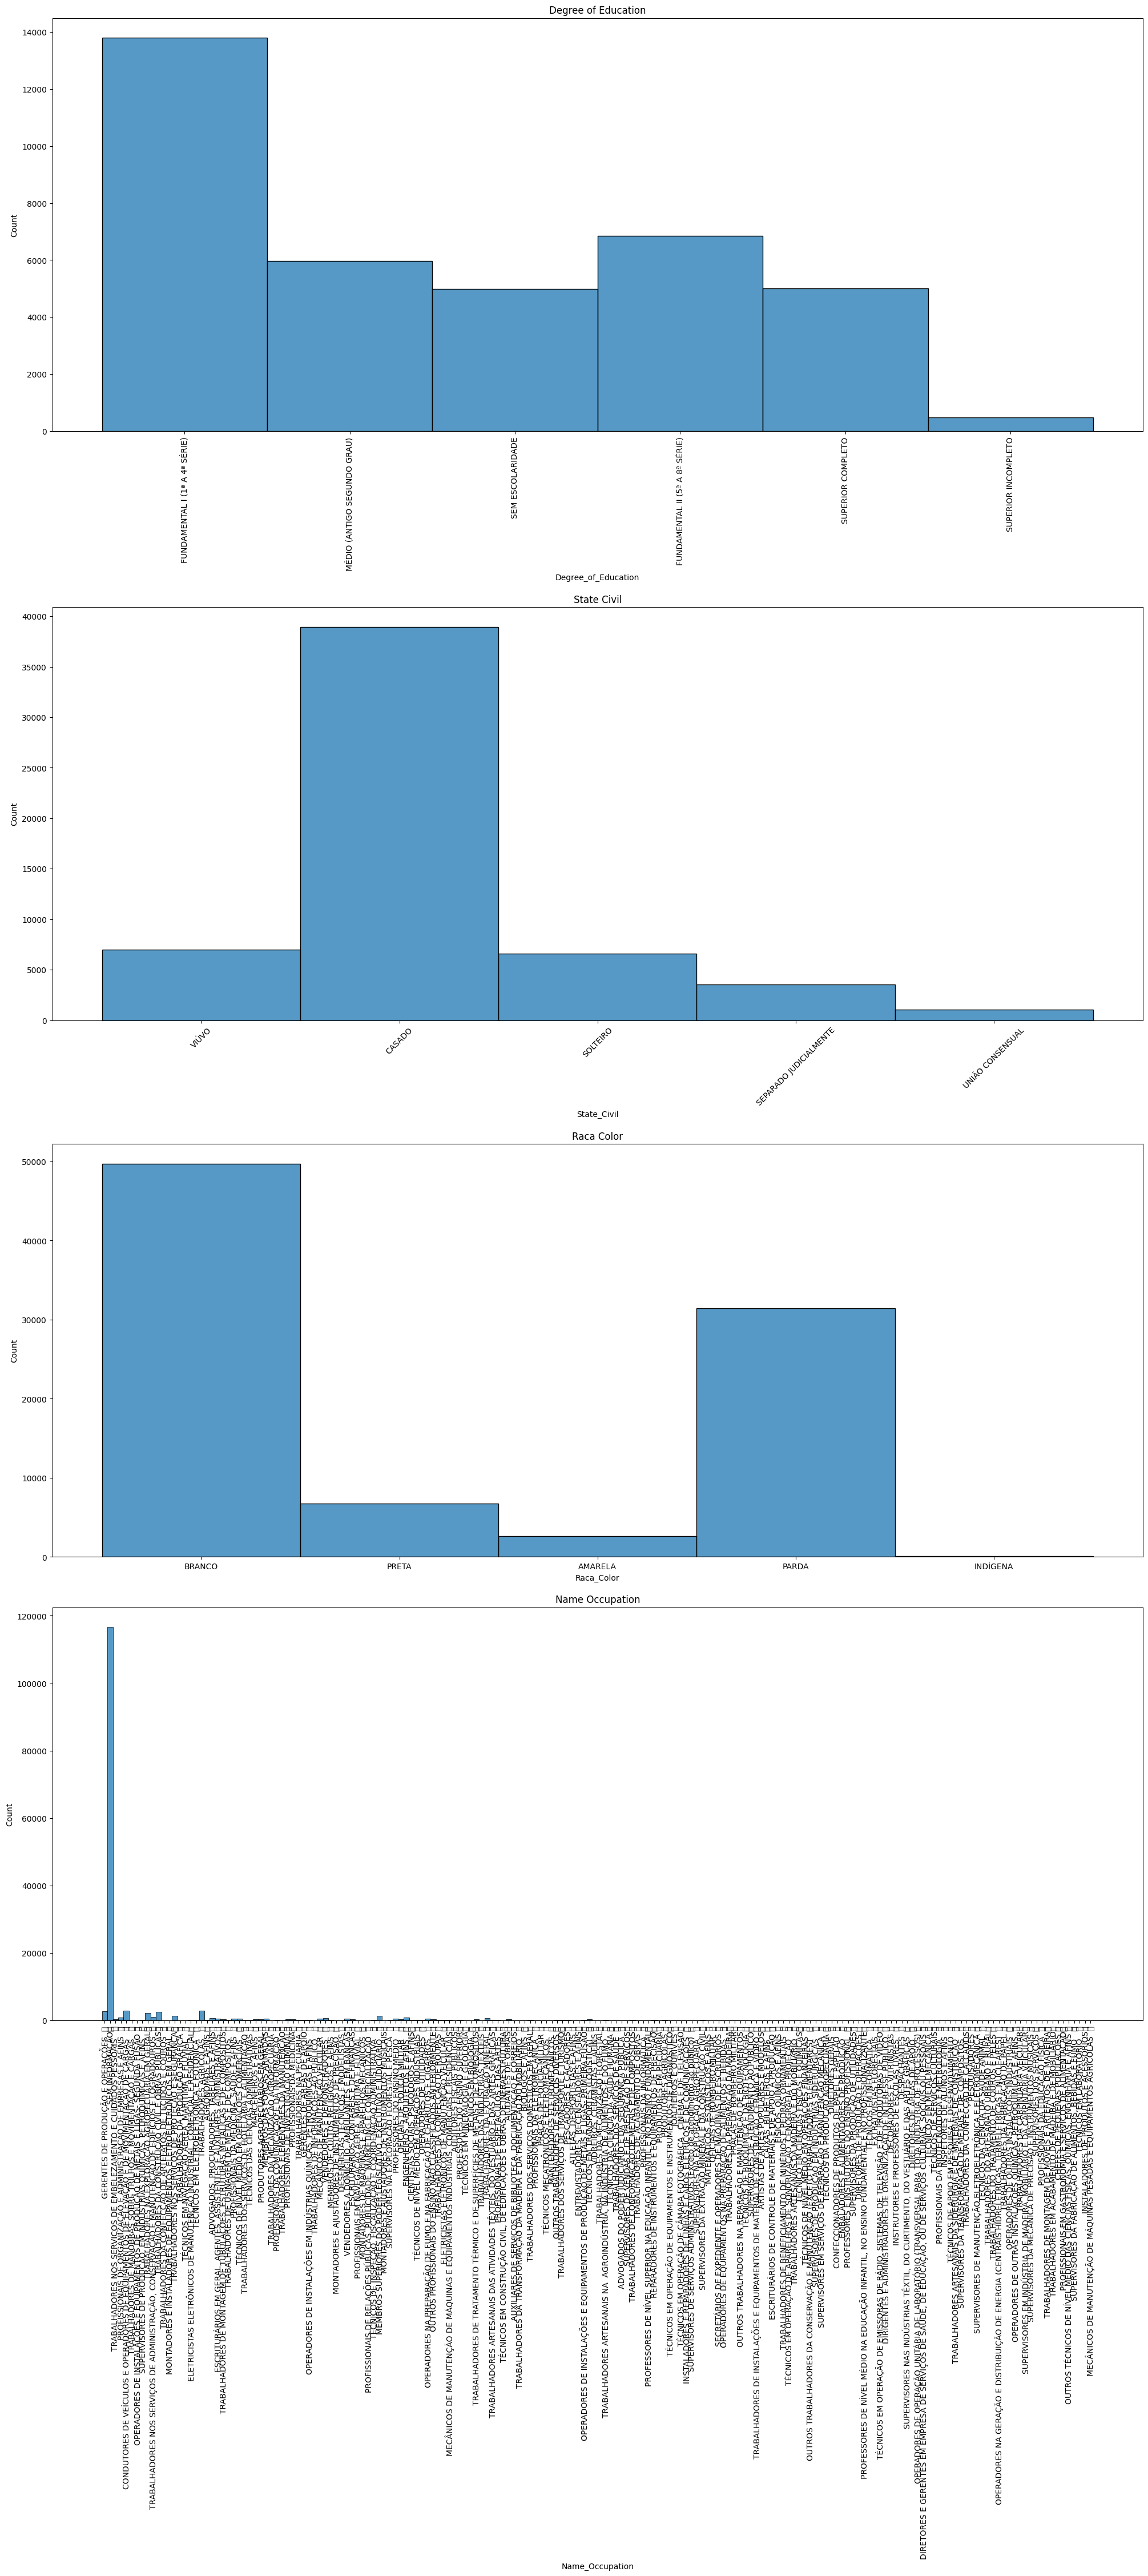

In [ ]:
fig, axis = plt.subplots(4, 1, figsize = (20, 45), constrained_layout=True)

sns.histplot(ax = axis[0], data = df_mod, x = "Degree_of_Education")
axis[0].set_title("Degree of Education",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_mod, x = "State_Civil")
axis[1].set_title("State Civil",loc="center")
axis[1].tick_params(axis='x', rotation=45)

sns.histplot(ax = axis[2], data = df_mod, x = "Raca_Color")
axis[2].set_title("Raca Color",loc="center")
axis[2].tick_params(axis='x', rotation=0)

sns.histplot(ax = axis[3], data = df_mod, x = "Name_Occupation")
axis[3].set_title("Name Occupation",loc="center")
axis[3].tick_params(axis='x', rotation=90)

plt.show()


<ipython-input-113-27f7743bd2ef>:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


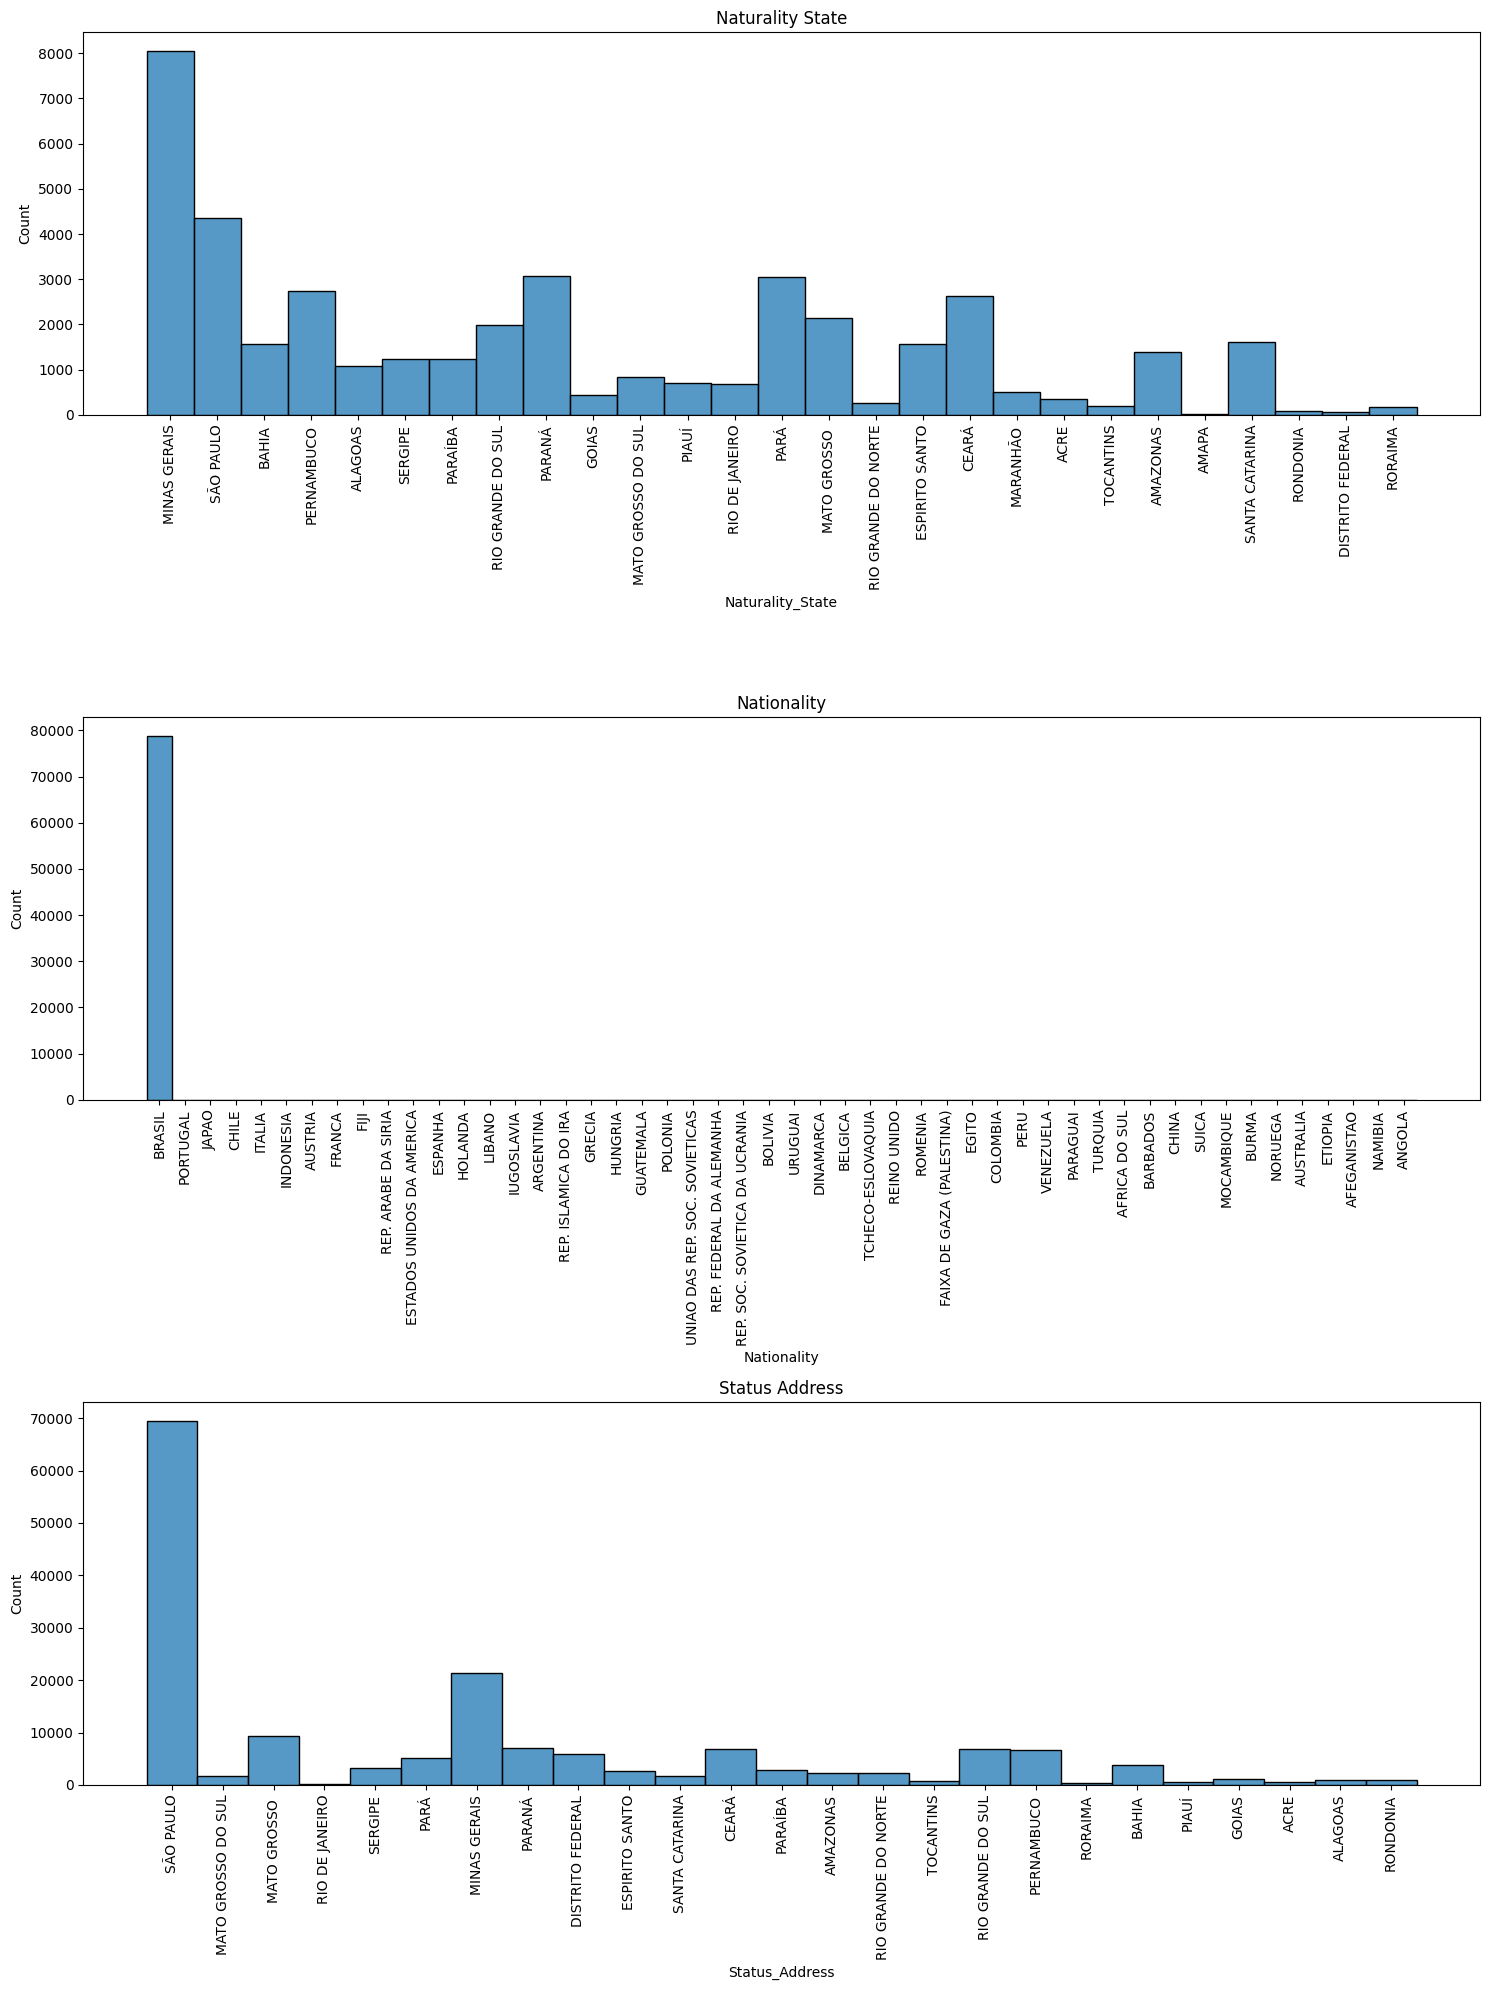

In [ ]:
fig, axis = plt.subplots(3, 1, figsize = (15, 20), constrained_layout=True)

sns.histplot(ax = axis[0], data = df_mod, x = "Naturality_State")
axis[0].set_title("Naturality State",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_mod, x = "Nationality")
axis[1].set_title("Nationality",loc="center")
axis[1].tick_params(axis='x', rotation=90)


sns.histplot(ax = axis[2], data = df_mod, x = "Status_Address")
axis[2].set_title("Status Address",loc="center")
axis[2].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

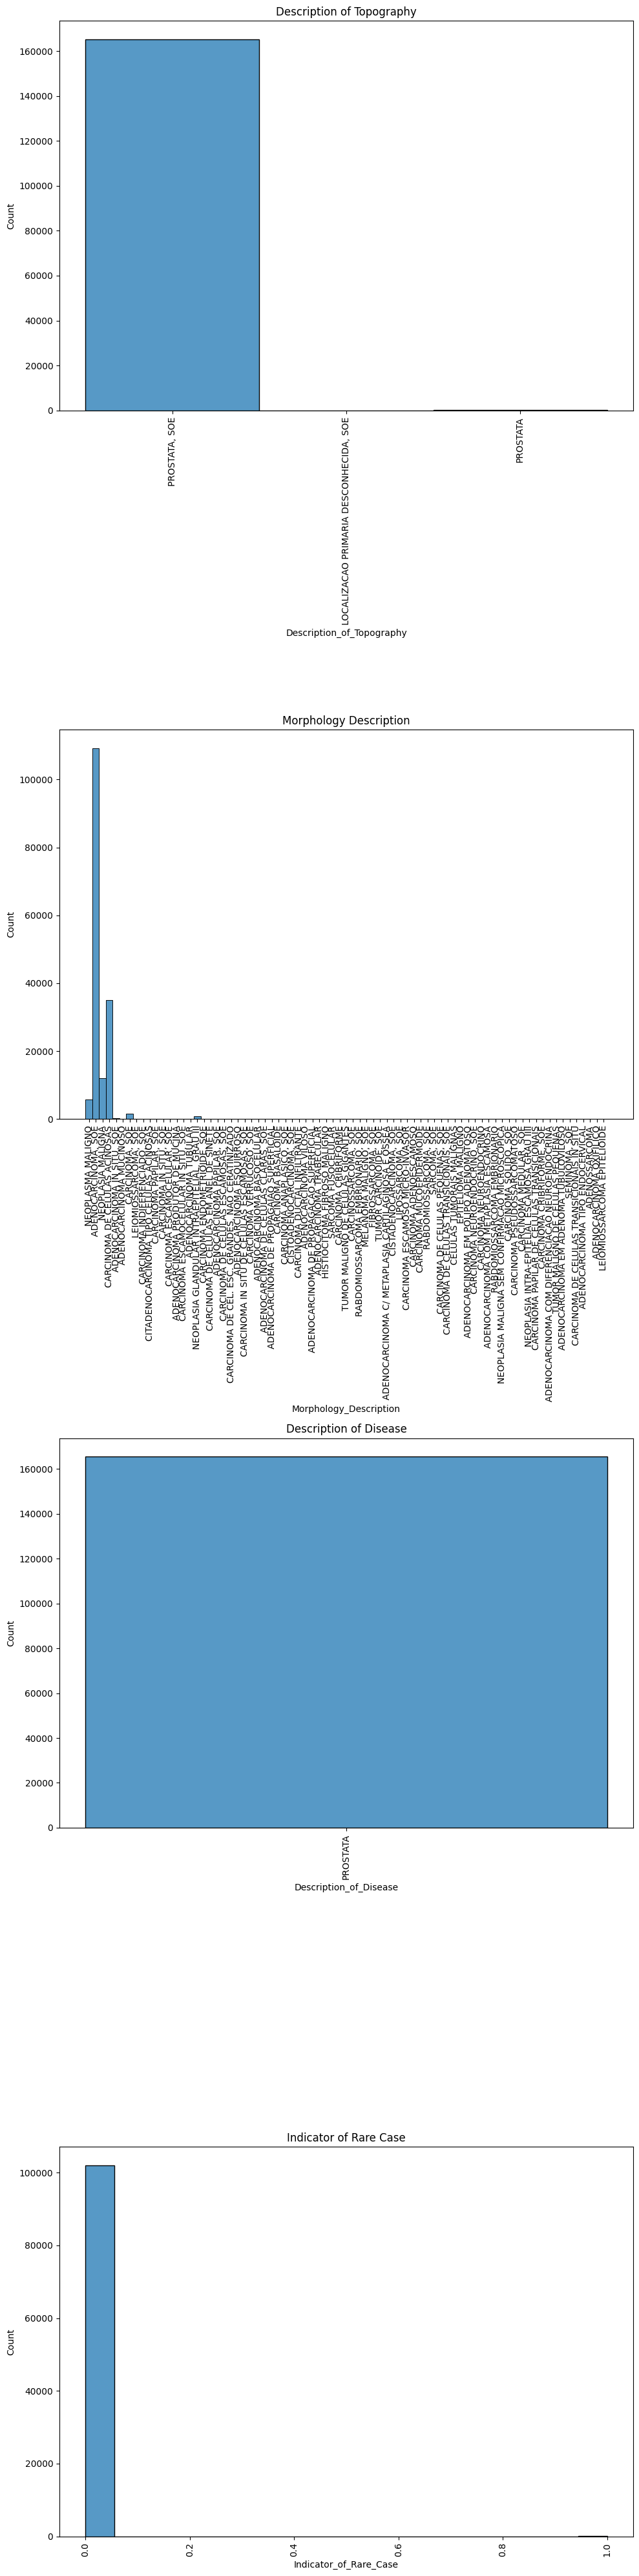

In [ ]:
fig, axis = plt.subplots(4, 1, figsize = (10, 40))

sns.histplot(ax = axis[0], data = df_mod, x = "Description_of_Topography")
axis[0].set_title("Description of Topography",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_mod, x = "Morphology_Description")
axis[1].set_title("Morphology Description",loc="center")
axis[1].tick_params(axis='x', rotation=90)


sns.histplot(ax = axis[2], data = df_mod, x = "Description_of_Disease")
axis[2].set_title("Description of Disease",loc="center")
axis[2].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[3], data = df_mod, x = "Indicator_of_Rare_Case")
axis[3].set_title("Indicator of Rare Case",loc="center")
axis[3].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

La topografia y la descripcion son constantes.
Indicador of rare case solo hay 1 asi que se puede eliminar




TypeError: 'value' must be an instance of str or bytes, not a float

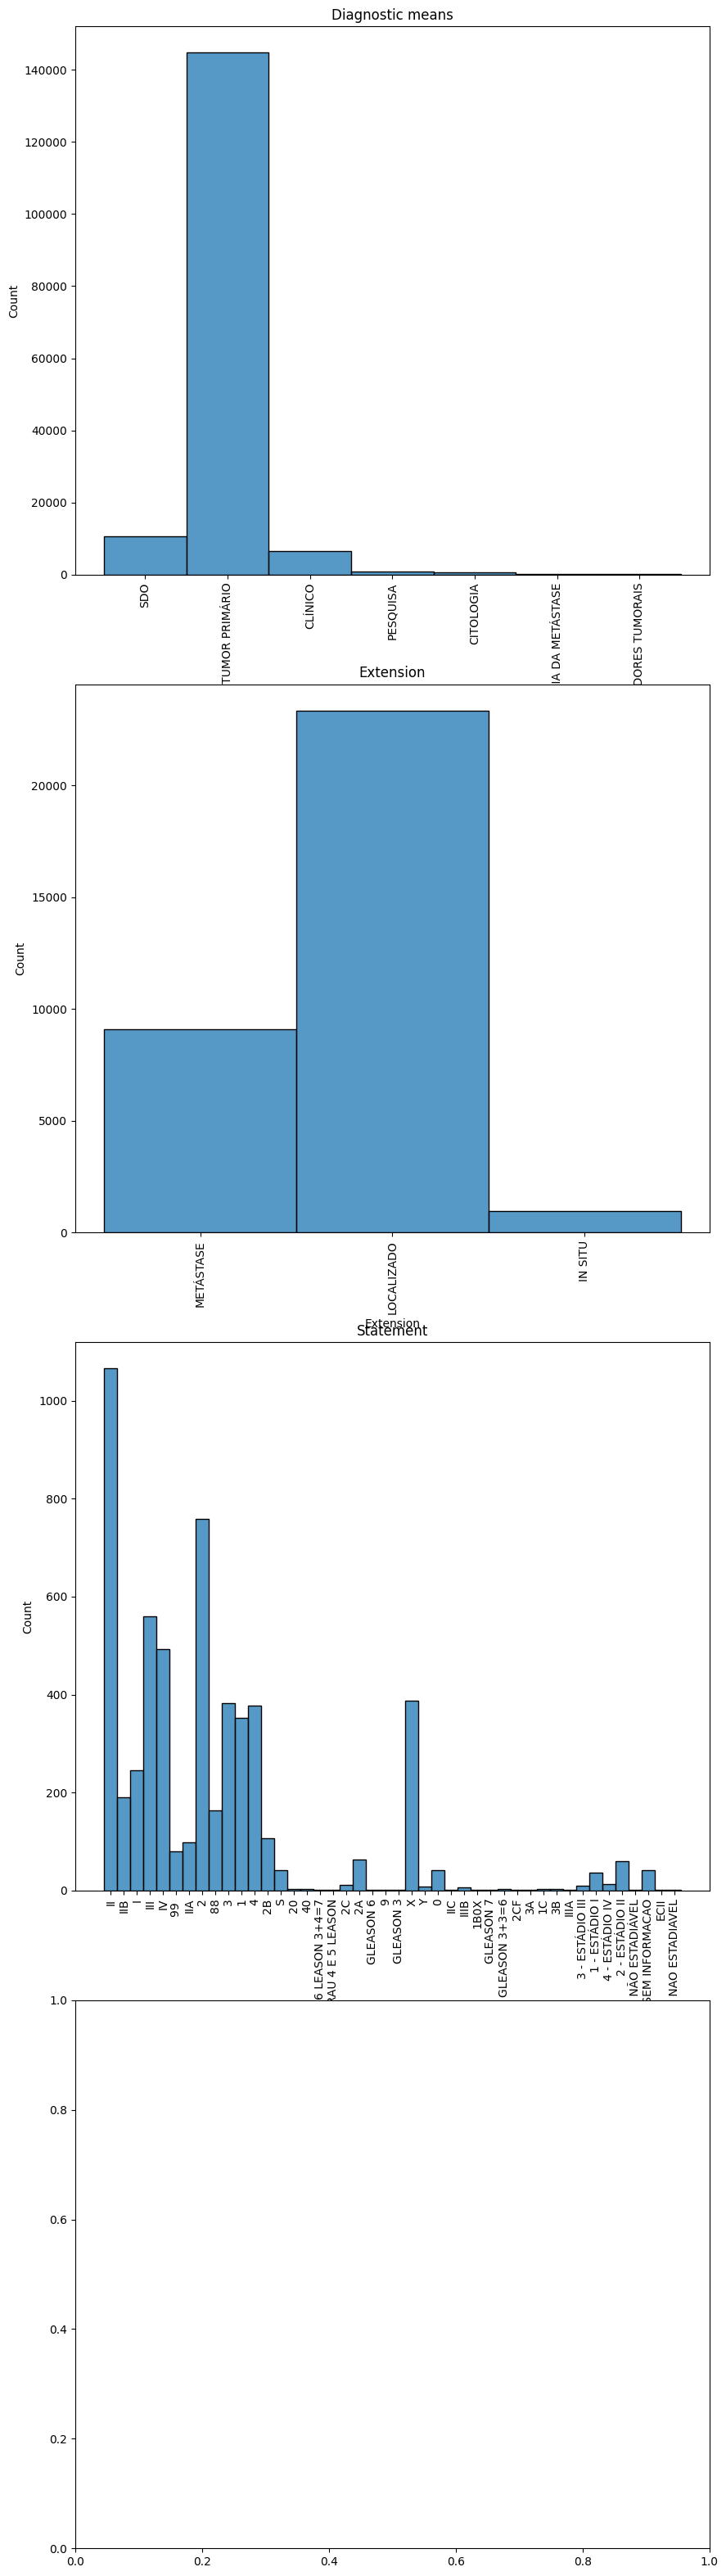

In [ ]:
fig, axis = plt.subplots(4, 1, figsize = (10, 40))

sns.histplot(ax = axis[0], data = df_mod, x = "Diagnostic_means")
axis[0].set_title("Diagnostic means",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_mod, x = "Extension")
axis[1].set_title("Extension",loc="center")
axis[1].tick_params(axis='x', rotation=90)


sns.histplot(ax = axis[2], data = df_mod, x = "Statement")
axis[2].set_title("Statement",loc="center")
axis[2].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[3], data = df_mod, x = "TNM")
axis[3].set_title("TNM",loc="center")
axis[3].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

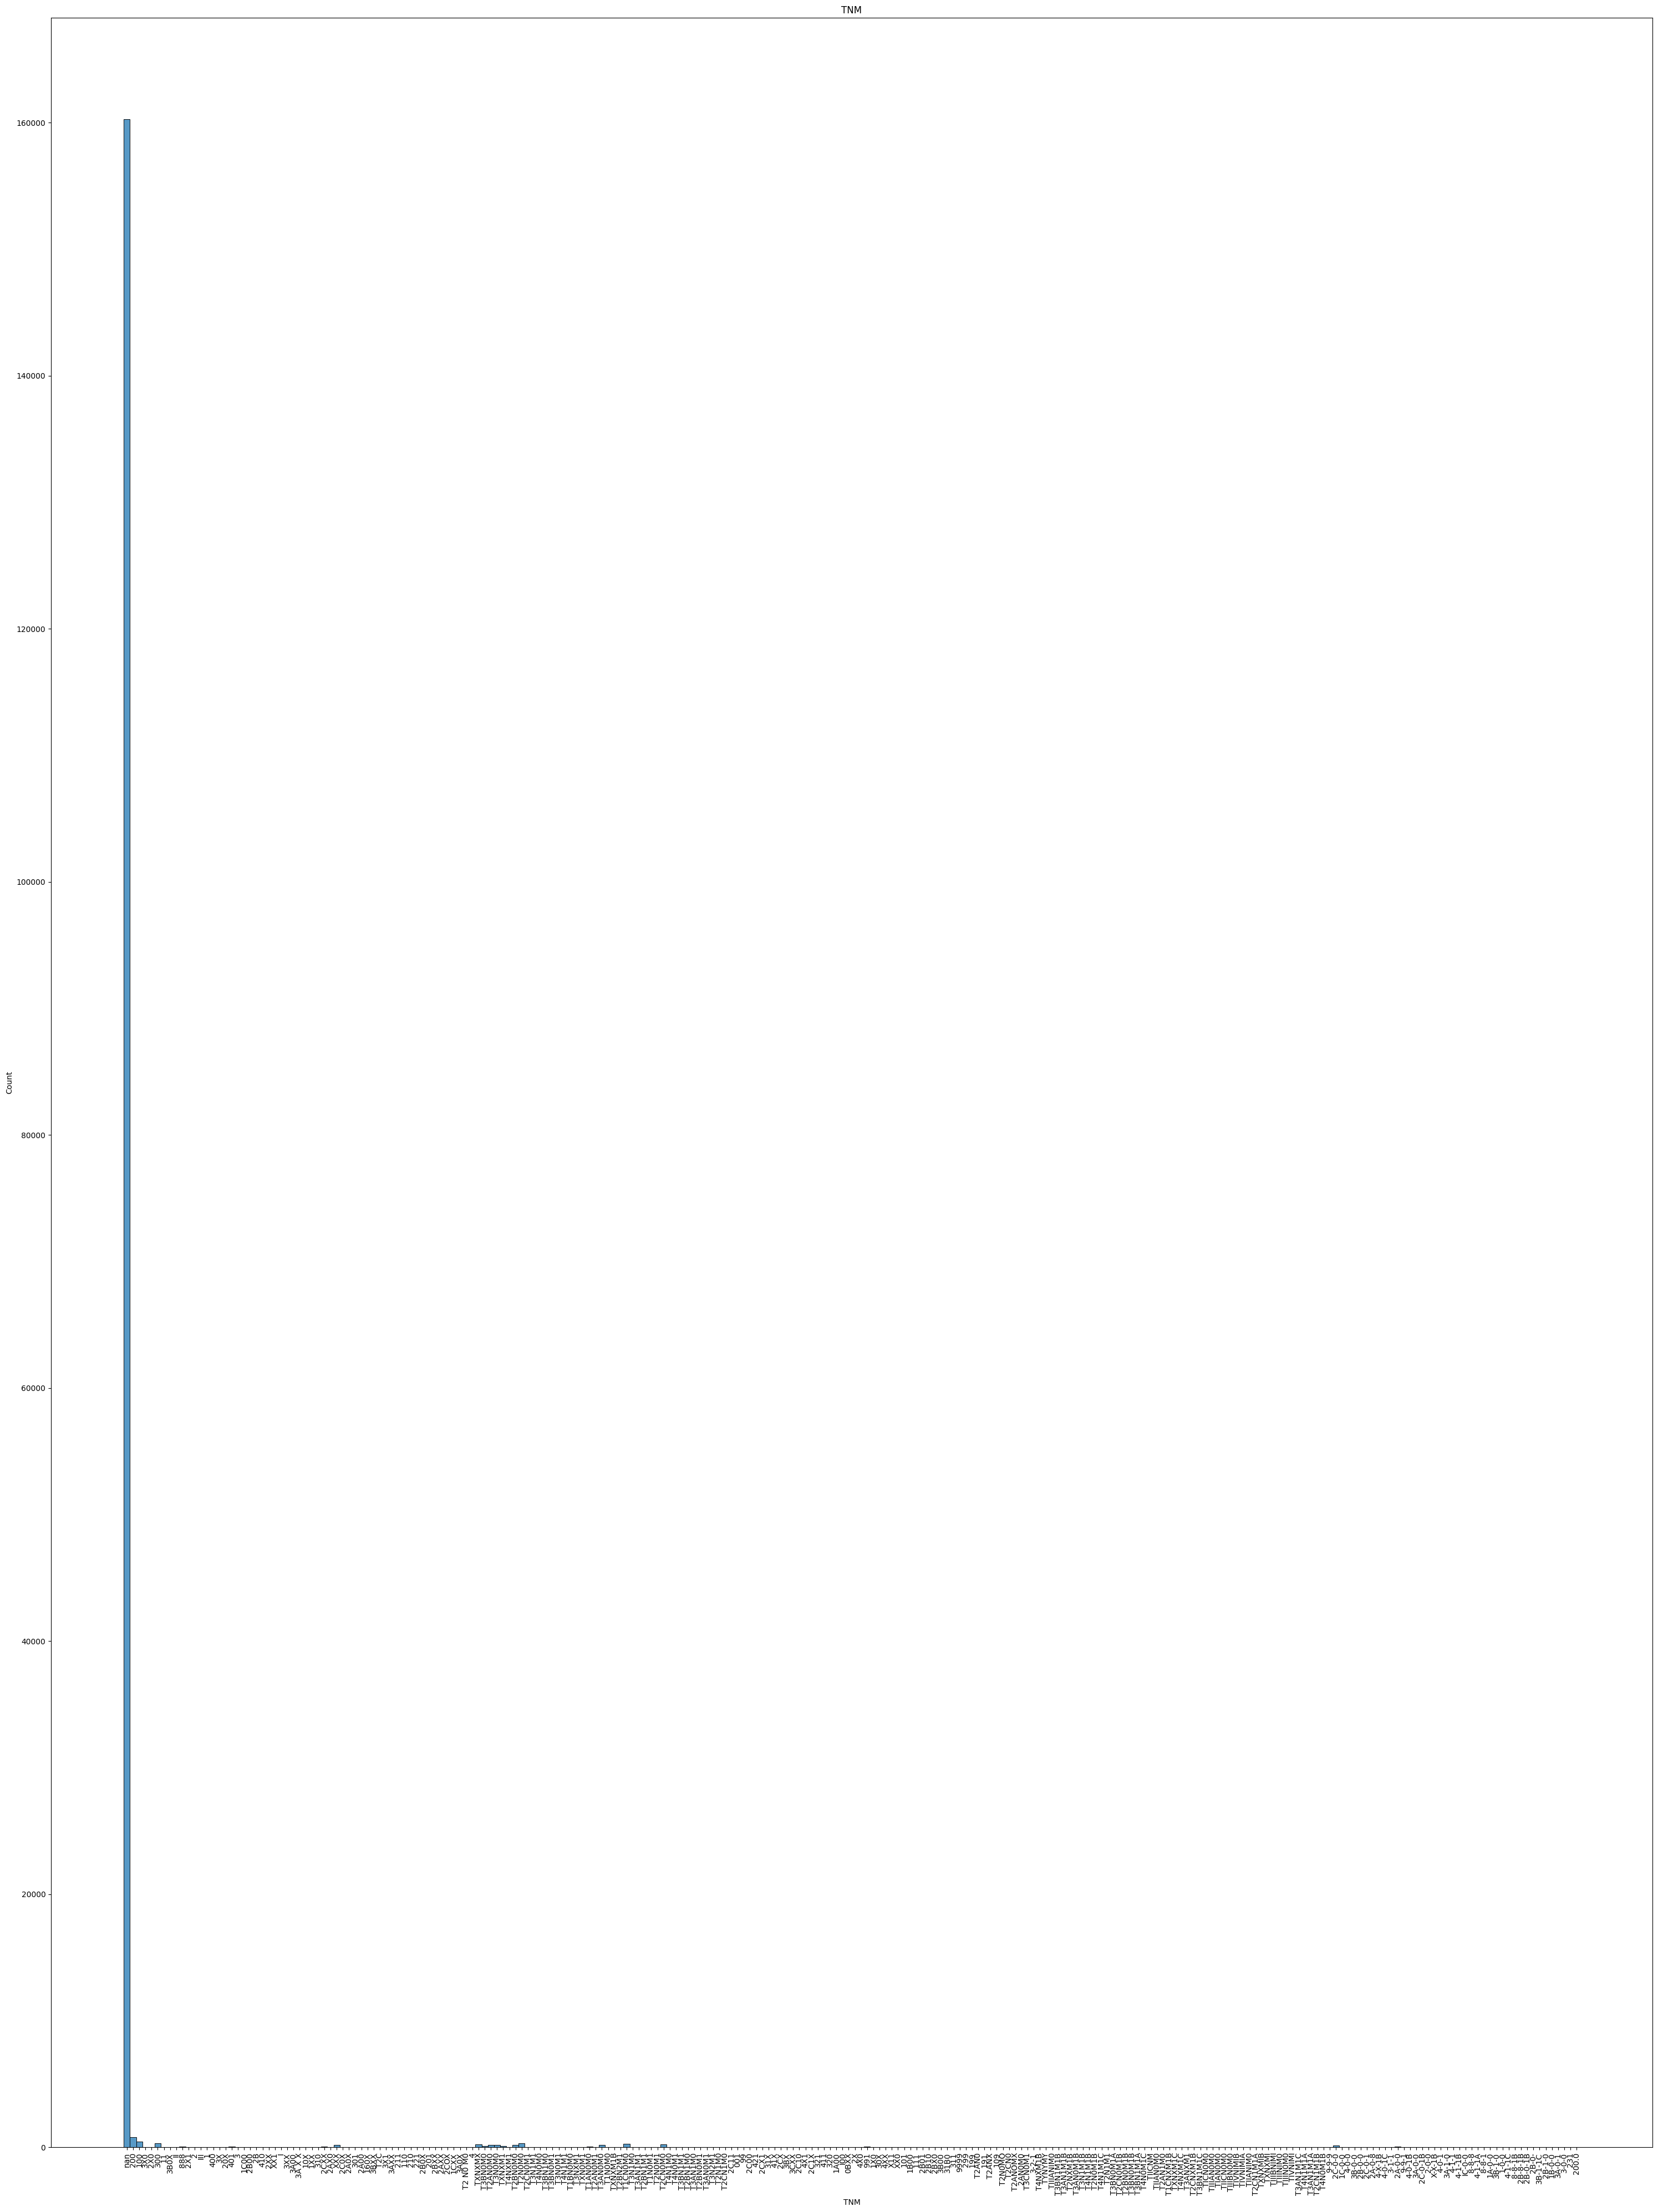

In [ ]:
df_mod['TNM'] = df_mod['TNM'].astype(str)
plt.figure(figsize=(30, 40))

sns.histplot(data=df_mod, x="TNM")

plt.title("TNM", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


En Extension hay que convertir in situ en localizado
En TNM hay que cambiar el contenido, hay que quitar la letra del código TNM

In [ ]:
df_mod["TNM"] = df_mod["TNM"].str.replace(r"[^\d]", "", regex=True)


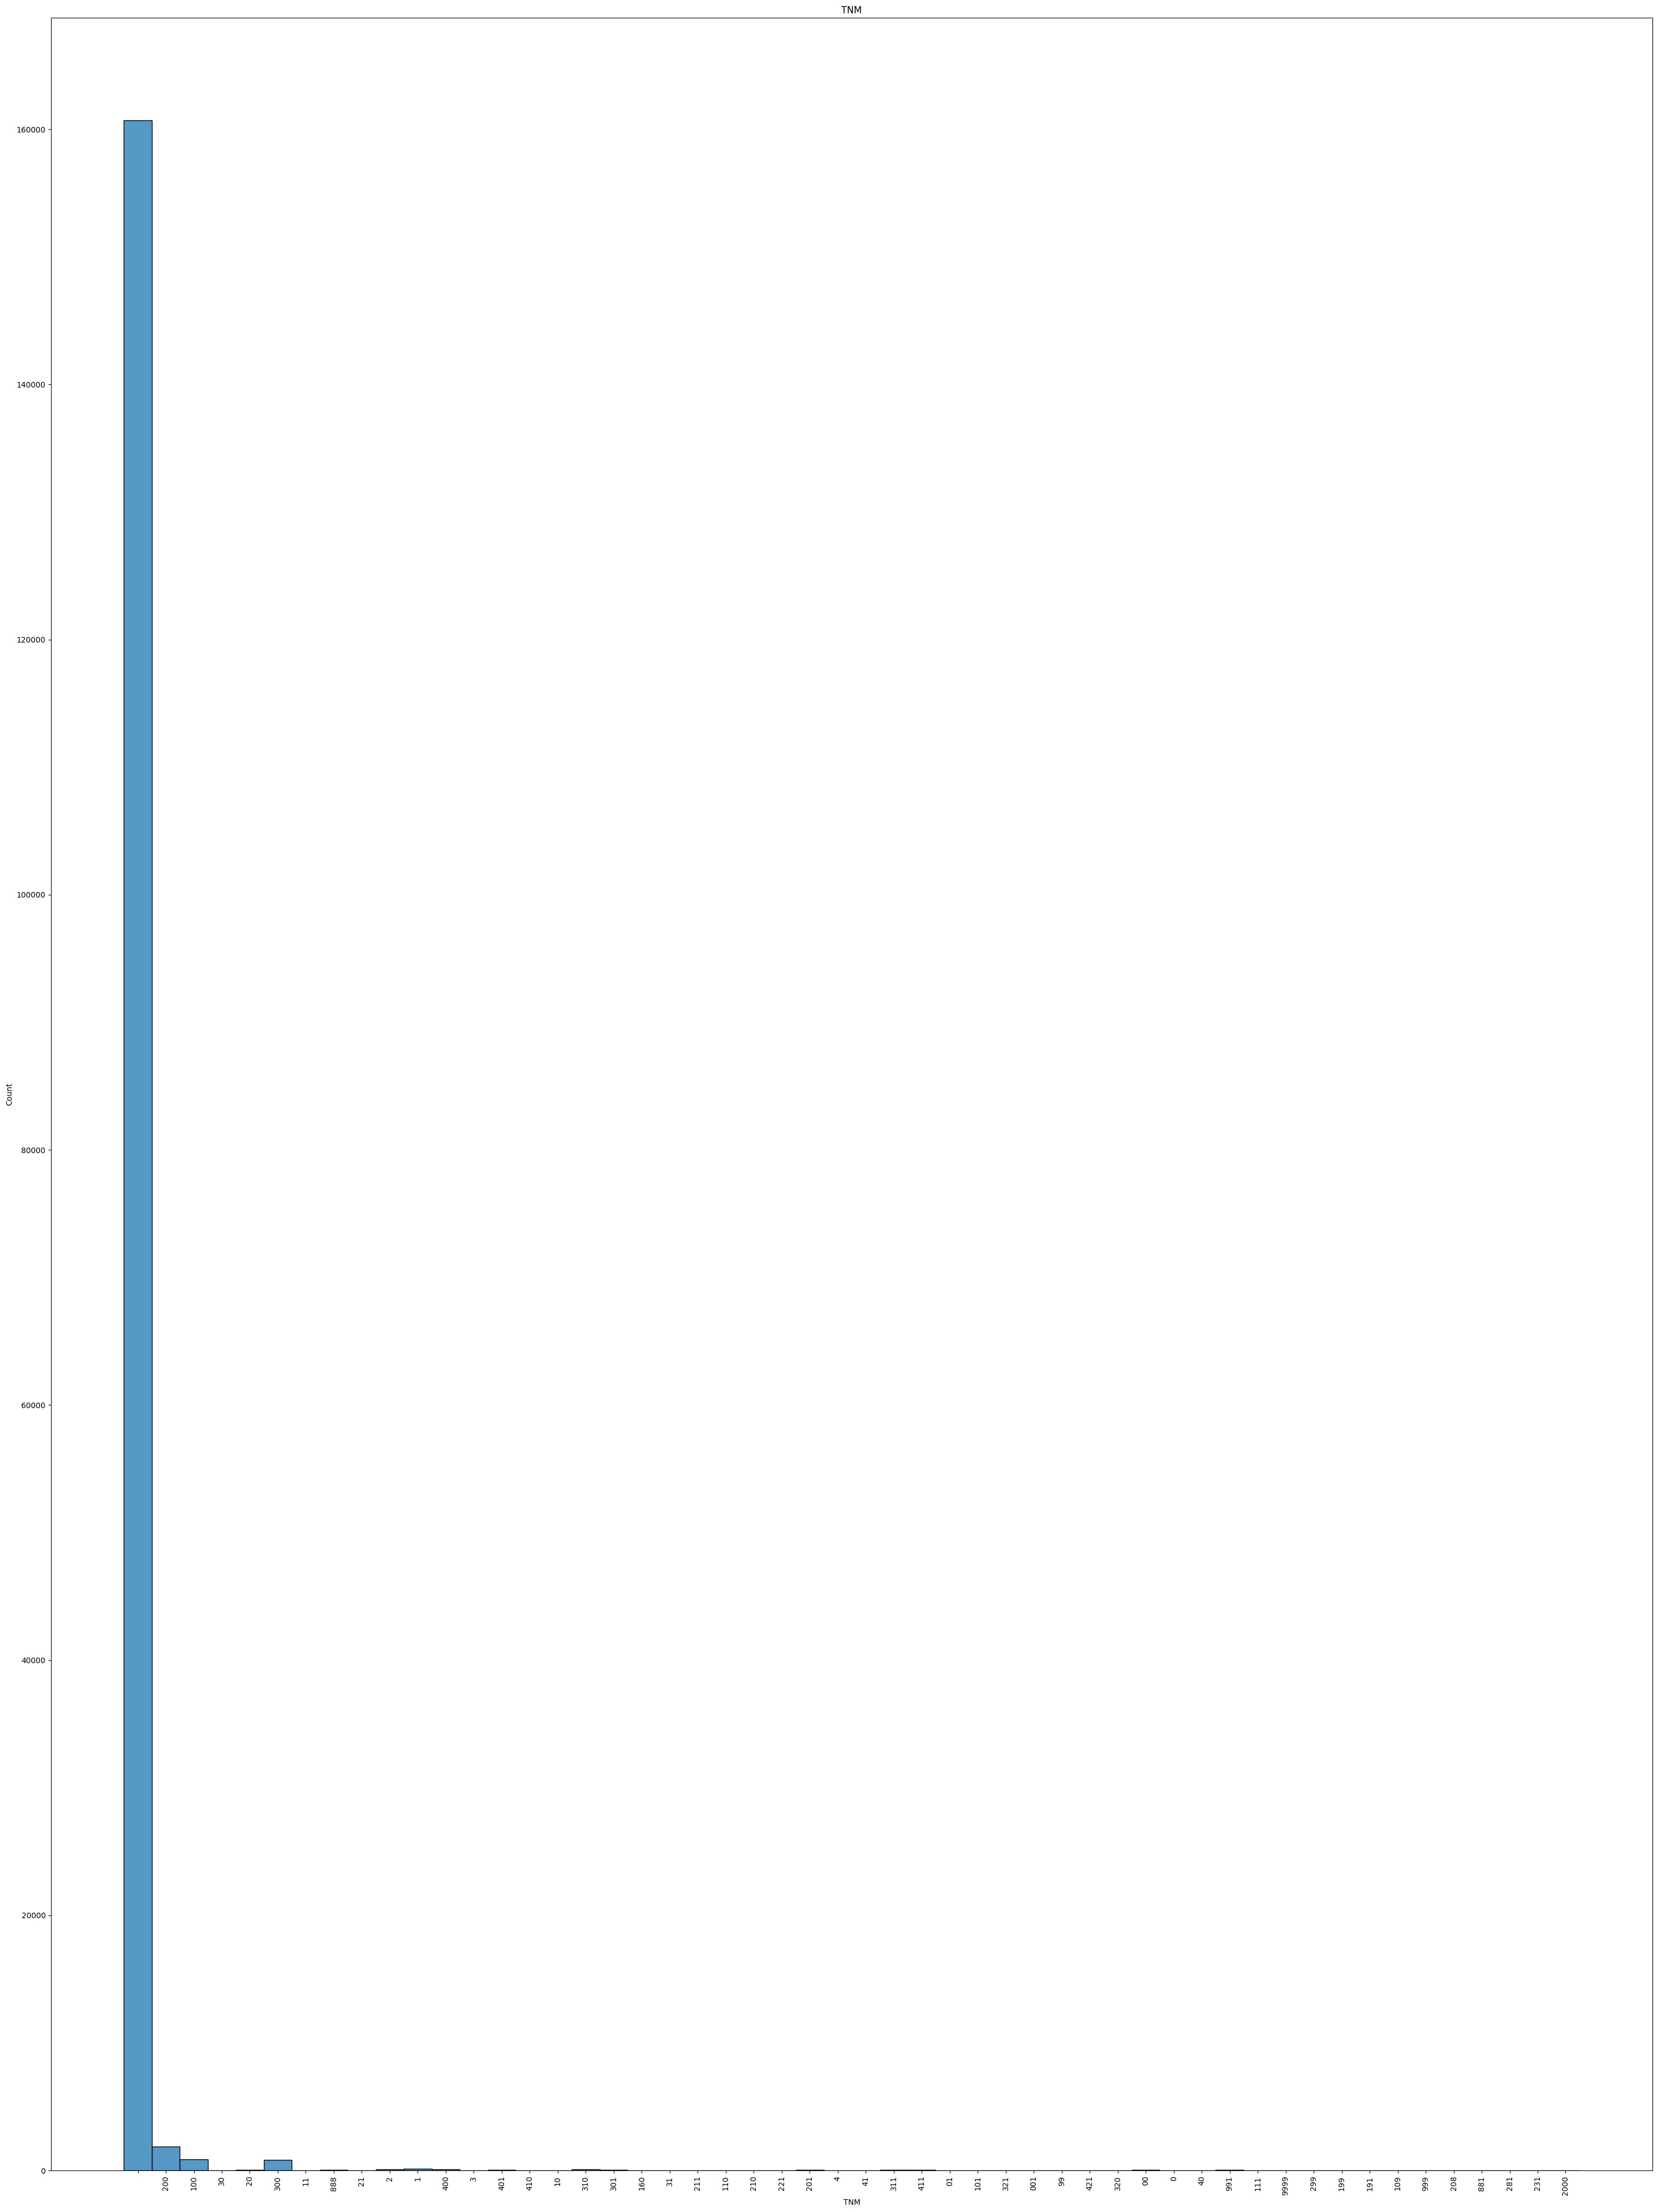

In [ ]:
df_mod['TNM'] = df_mod['TNM'].astype(str)
plt.figure(figsize=(30, 40))

sns.histplot(data=df_mod, x="TNM")

plt.title("TNM", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


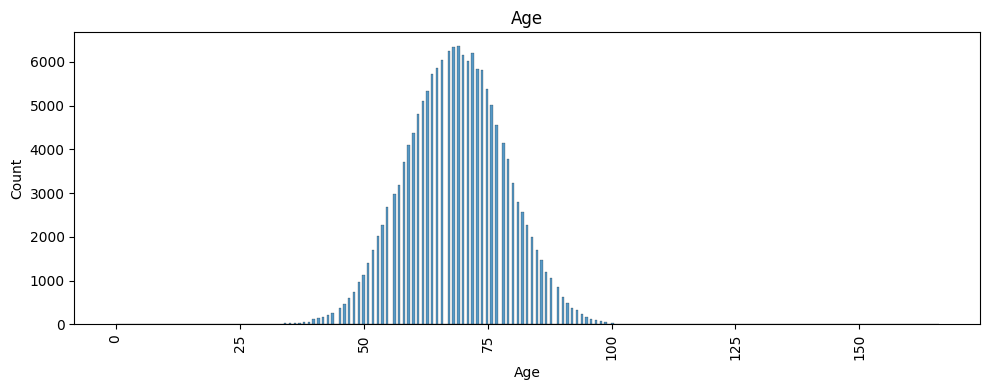

In [ ]:
plt.figure(figsize=(10, 4))

sns.histplot(data=df_mod, x="Age")

plt.title("Age", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

Después de visualizar los datos, voy a eliminar, modificar y crear nuevas columnas

In [ ]:
df_mod= df_mod.drop(columns=["City_Address", "Description_of_Topography", "Description_of_Disease", "Indicator_of_Rare_Case"])

In [ ]:
df_mod= df_mod.drop(columns=["Date_of_Last_Contact"])

In [ ]:
df_mod["Extension"] = df_mod["Extension"].replace("In situ", "Localizado")

In [ ]:
df_mod['Date_of_Death'] = df_mod['Date_of_Death'].replace({'0': pd.NaT, '0000-00-00': pd.NaT})

Crear una columna que reste el tiempo de muerte con el diagnostico para ver el tiempo de vida post diagnostico (en días)

In [ ]:
df_mod['Date_of_Death'] = pd.to_datetime(df_mod['Date_of_Death'], errors='coerce')
df_mod['Date_of_Diagnostic'] = pd.to_datetime(df_mod['Date_of_Diagnostic'], errors='coerce')

# Your remaining code to calculate 'Tiempo_Post_Diagnostico'
df_mod['Tiempo_Post_Diagnostico'] = (df_mod['Date_of_Death'] - df_mod['Date_of_Diagnostic']).dt.days
df_mod.loc[df_mod['Status_Vital'] != "MORTO", 'Tiempo_Post_Diagnostico'] = None

In [ ]:
df_mod

Age Raca_Color Nationality Naturality_State Degree_of_Education  \
23       100.0        NaN      BRASIL     MINAS GERAIS                 NaN   
51        76.0        NaN         NaN              NaN                 NaN   
73        72.0     BRANCO      BRASIL        SÃO PAULO                 NaN   
94        78.0     BRANCO      BRASIL     MINAS GERAIS                 NaN   
116       80.0        NaN         NaN              NaN                 NaN   
...        ...        ...         ...              ...                 ...   
1777911   53.0      PRETA         NaN              NaN                 NaN   
1777940   65.0      PRETA         NaN              NaN                 NaN   
1777967   87.0      PARDA         NaN              NaN                 NaN   
1778067   46.0      PRETA         NaN              NaN                 NaN   
1778156   60.0      PARDA         NaN              NaN                 NaN   

        State_Civil                                    Name_Occupation  \
23            VIÚVO               GERENTES DE PRODUÇÃO E OPERAÇÕES  \t   
51              NaN                                   SEM INFORMAÇÃO\t   
73           CASADO  TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...   
94            VIÚVO                                   SEM INFORMAÇÃO\t   
116             NaN                                   SEM INFORMAÇÃO\t   
...             ...                                                ...   
1777911         NaN                                   SEM INFORMAÇÃO\t   
1777940         NaN                                   SEM INFORMAÇÃO\t   
1777967         NaN                                   SEM INFORMAÇÃO\t   
1778067         NaN                                   SEM INFORMAÇÃO\t   
1778156         NaN                                   SEM INFORMAÇÃO\t   

        Status_Address         Morphology_Description  \
23           SÃO PAULO              NEOPLASMA MALIGNO   
51           SÃO PAULO            ADENOCARCINOMA, SOE   
73           SÃO PAULO              NEOPLASMA MALIGNO   
94           SÃO PAULO              NEOPLASMA MALIGNO   
116          SÃO PAULO            ADENOCARCINOMA, SOE   
...                ...                            ...   
1777911            NaN  CARCINOMA DE CELULAS ACINOSAS   
1777940            NaN  CARCINOMA DE CELULAS ACINOSAS   
1777967            NaN  CARCINOMA DE CELULAS ACINOSAS   
1778067            NaN  CARCINOMA DE CELULAS ACINOSAS   
1778156            NaN  CARCINOMA DE CELULAS ACINOSAS   

                     Diagnostic_means   Extension Statement TNM Status_Vital  \
23                                SDO         NaN       NaN            MORTO   
51       HISTOLOGIA DO TUMOR PRIMÁRIO         NaN       NaN             VIVO   
73                                SDO         NaN       NaN            MORTO   
94                                SDO   METÁSTASE       NaN            MORTO   
116      HISTOLOGIA DO TUMOR PRIMÁRIO         NaN       NaN              NaN   
...                               ...         ...       ...  ..          ...   
1777911  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO       NaN              NaN   
1777940  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN       NaN              NaN   
1777967  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE       NaN              NaN   
1778067  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO       NaN              NaN   
1778156           MARCADORES TUMORAIS  LOCALIZADO       NaN              NaN   

        Type_of_Death Date_of_Death Date_of_Diagnostic Distant_metastasis  \
23             CÂNCER    2000-05-18         2000-05-18                NaN   
51                 NO           NaT         2000-05-18                NaN   
73         NÃO CÂNCER    2003-04-24         2003-04-24                NaN   
94             CÂNCER    2000-06-19         2000-06-19                NaN   
116               NaN           NaT         2000-11-07                NaN   
...               ...           ...                ...                ...   


In [ ]:
df_morto = df_mod[df_mod['Status_Vital'] == 'MORTO']

Creo un df porque he decidido que el proyecto será un predictor de días de vida tras diagnostico de cancer de prostata

In [ ]:
df_morto.shape

(29446, 20)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


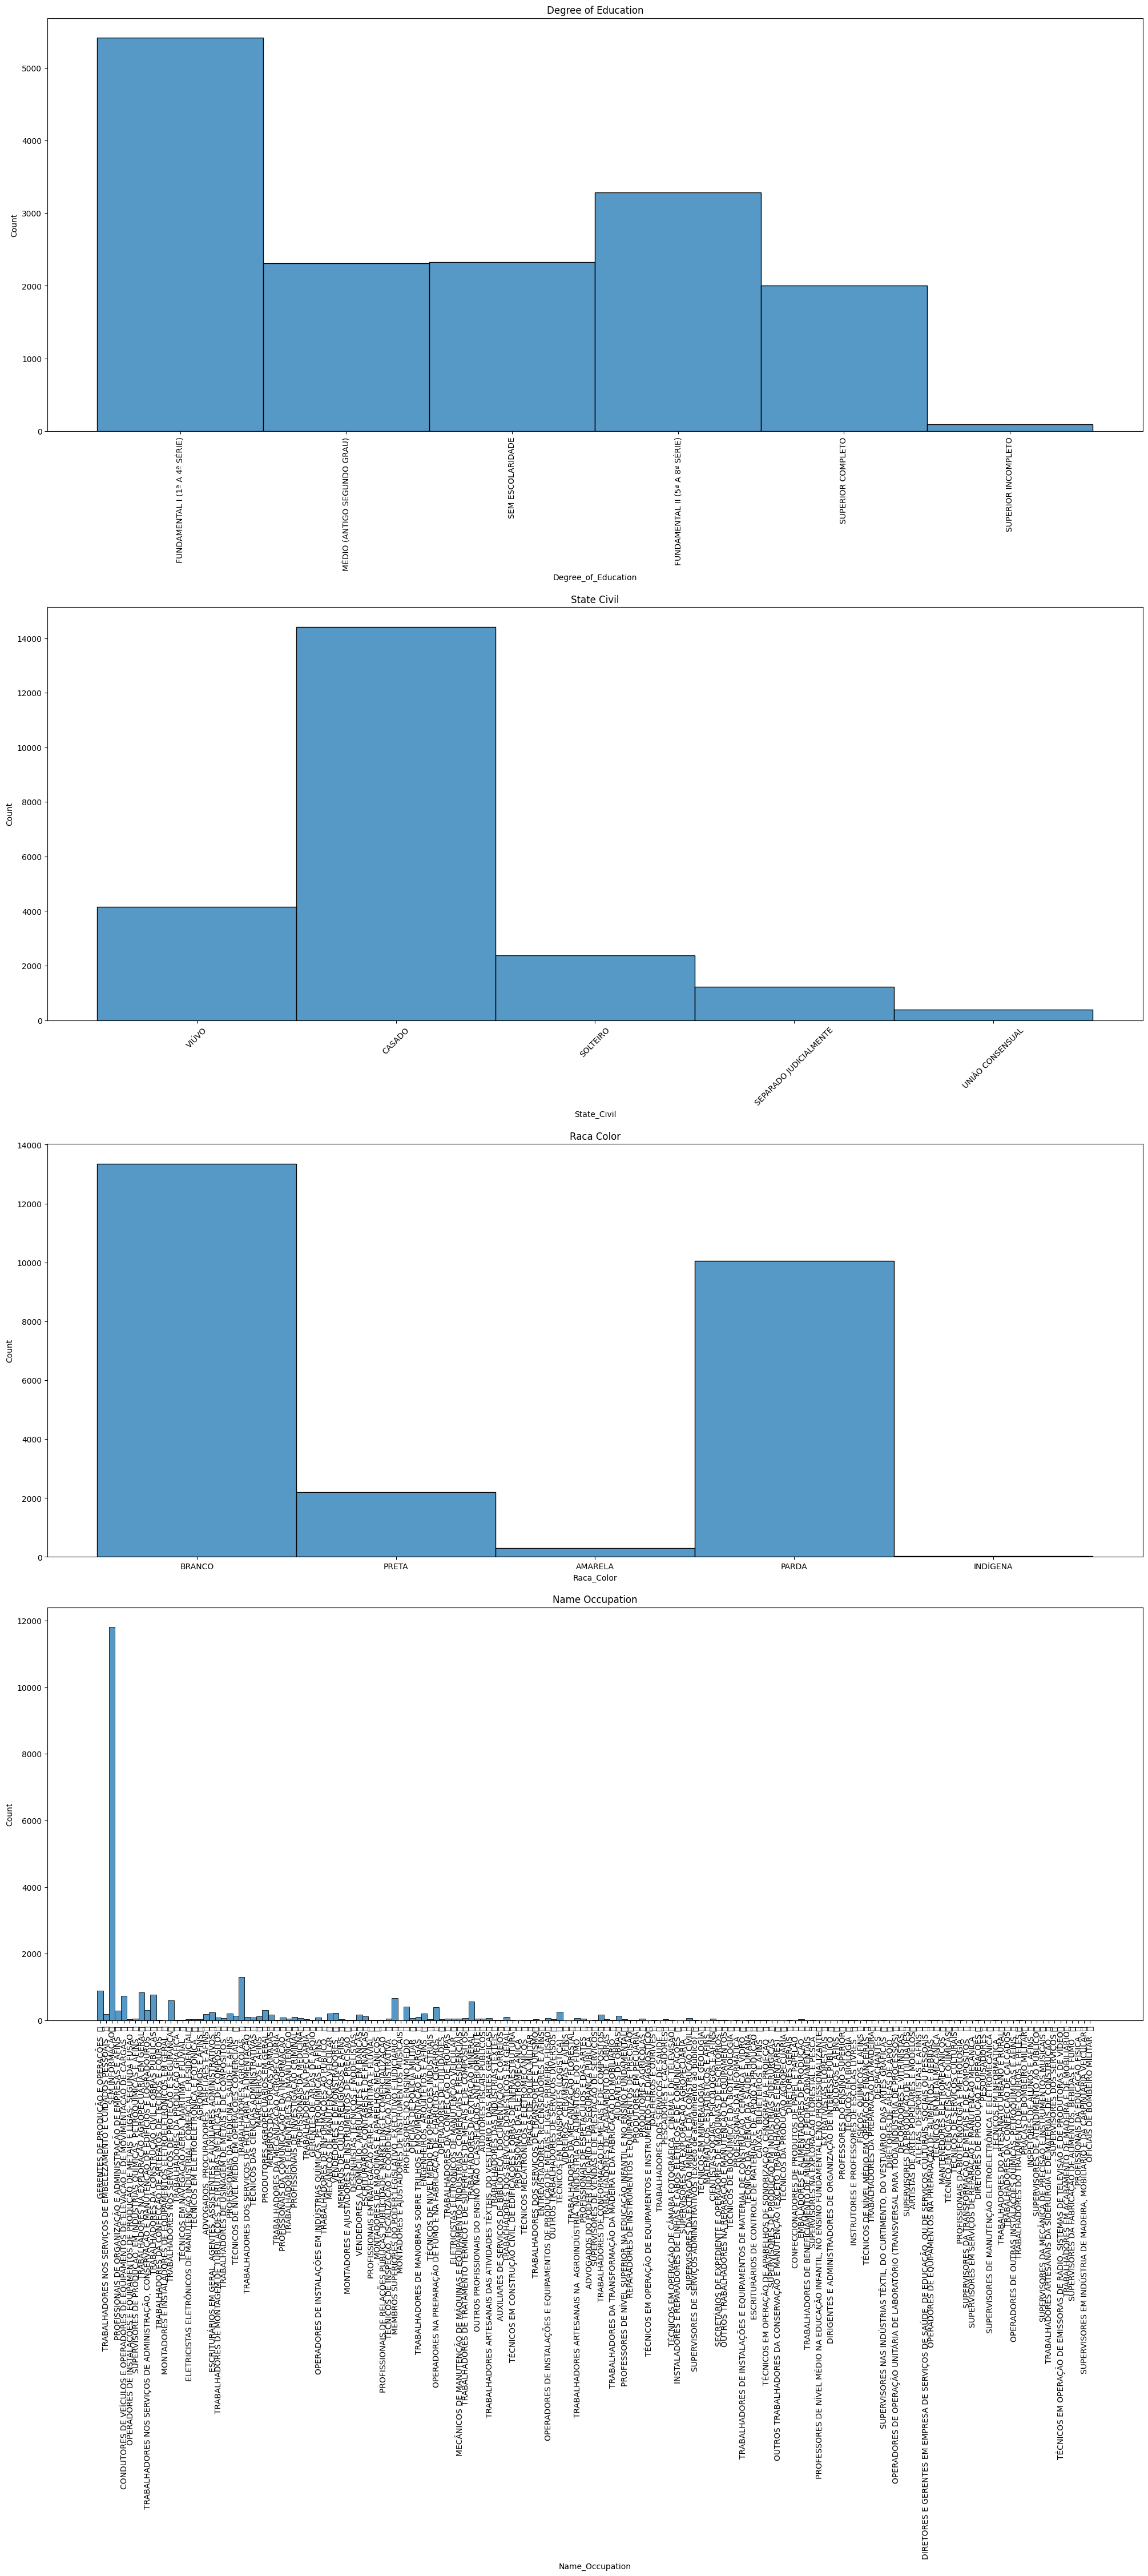

In [ ]:
fig, axis = plt.subplots(4, 1, figsize = (20, 45), constrained_layout=True)

sns.histplot(ax = axis[0], data = df_morto, x = "Degree_of_Education")
axis[0].set_title("Degree of Education",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_morto, x = "State_Civil")
axis[1].set_title("State Civil",loc="center")
axis[1].tick_params(axis='x', rotation=45)

sns.histplot(ax = axis[2], data = df_morto, x = "Raca_Color")
axis[2].set_title("Raca Color",loc="center")
axis[2].tick_params(axis='x', rotation=0)

sns.histplot(ax = axis[3], data = df_morto, x = "Name_Occupation")
axis[3].set_title("Name Occupation",loc="center")
axis[3].tick_params(axis='x', rotation=90)

plt.show()


<ipython-input-129-ee732571f473>:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


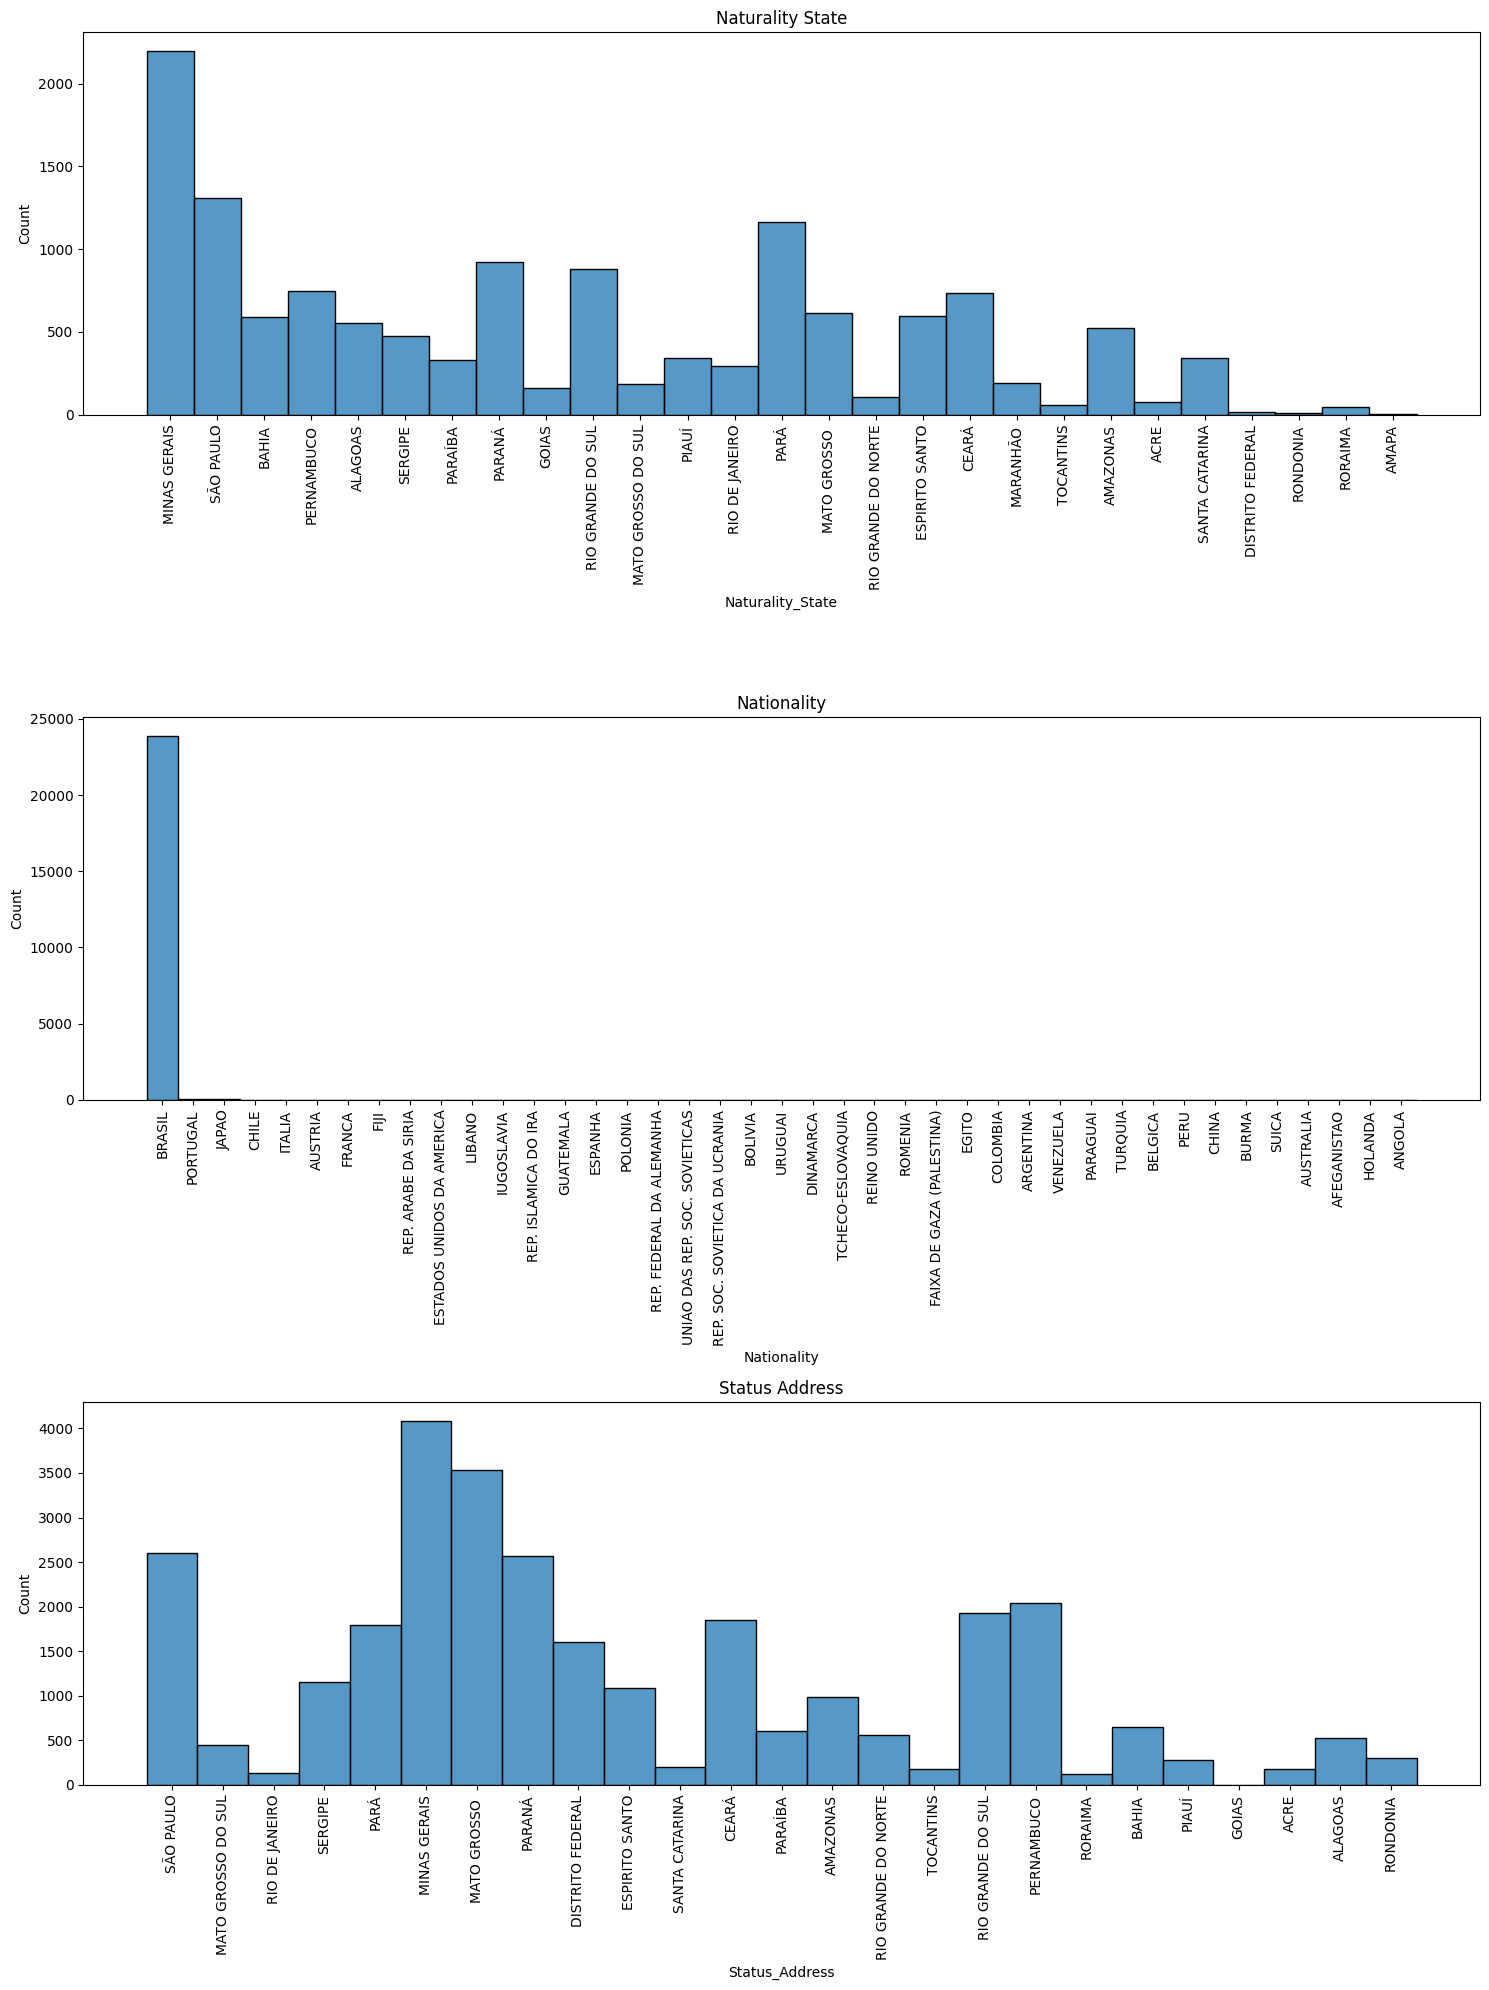

In [ ]:
fig, axis = plt.subplots(3, 1, figsize = (15, 20), constrained_layout=True)

sns.histplot(ax = axis[0], data = df_morto, x = "Naturality_State")
axis[0].set_title("Naturality State",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_morto, x = "Nationality")
axis[1].set_title("Nationality",loc="center")
axis[1].tick_params(axis='x', rotation=90)


sns.histplot(ax = axis[2], data = df_morto, x = "Status_Address")
axis[2].set_title("Status Address",loc="center")
axis[2].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

<ipython-input-130-61e75b78baee>:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


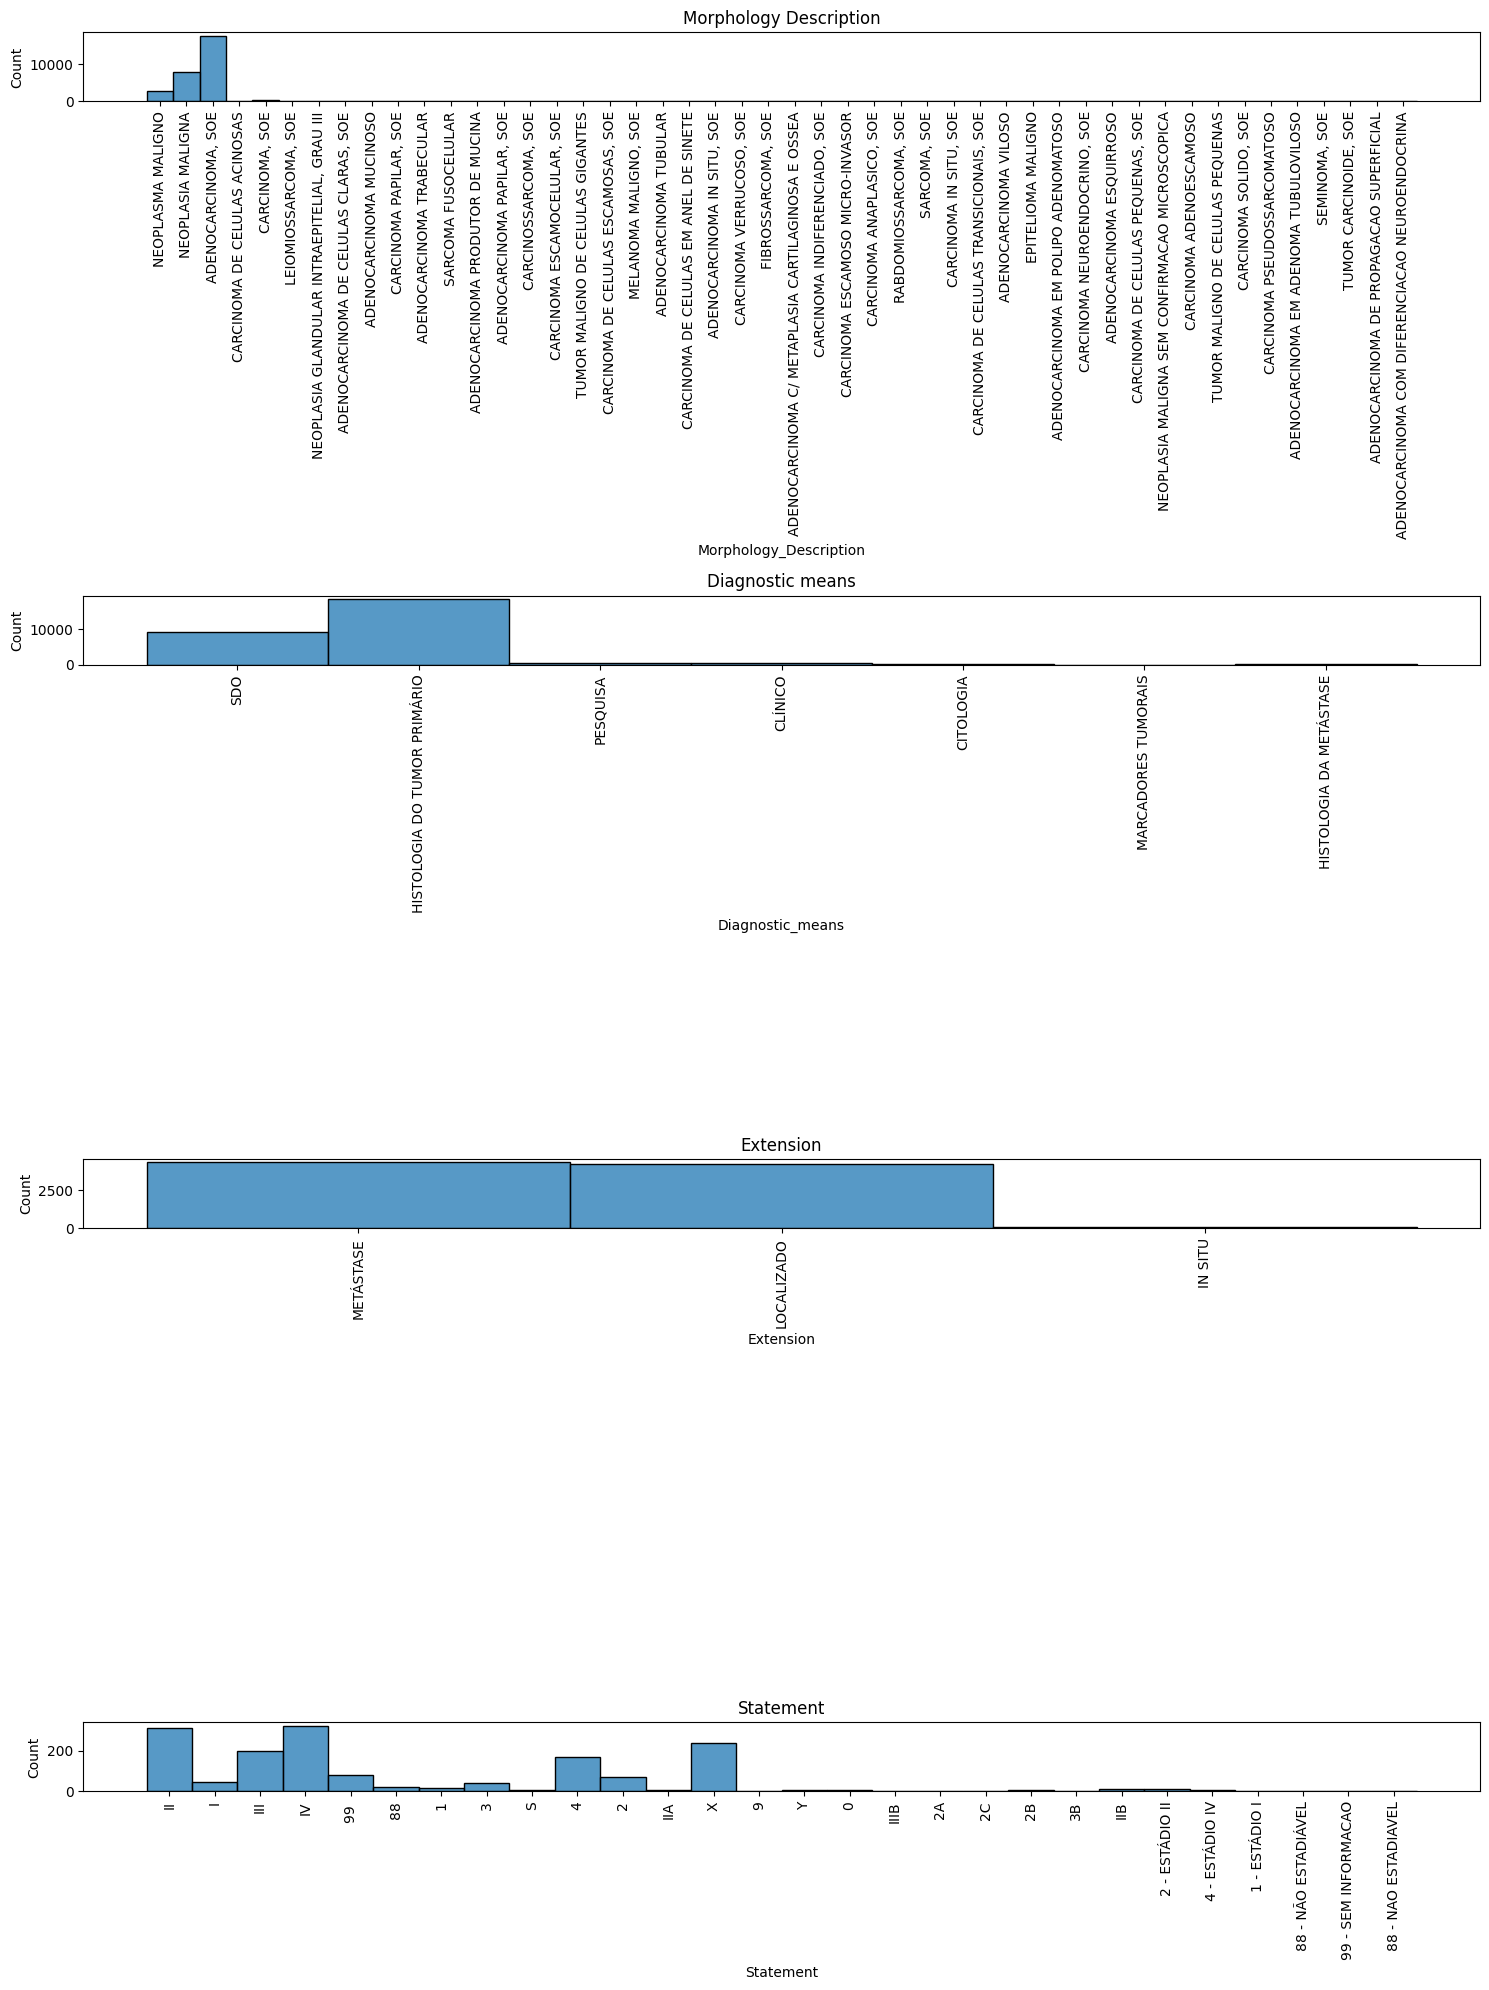

In [ ]:
fig, axis = plt.subplots(4, 1, figsize = (15, 20), constrained_layout=True)

sns.histplot(ax = axis[0], data = df_morto, x = "Morphology_Description")
axis[0].set_title("Morphology Description",loc="center")
axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[1], data = df_morto, x = "Diagnostic_means")
axis[1].set_title("Diagnostic means",loc="center")
axis[1].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[2], data = df_morto, x = "Extension")
axis[2].set_title("Extension",loc="center")
axis[2].tick_params(axis='x', rotation=90)


sns.histplot(ax = axis[3], data = df_morto, x = "Statement")
axis[3].set_title("Statement",loc="center")
axis[3].tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
df_morto["Morphology_Description"].unique()

array(['NEOPLASMA MALIGNO', 'NEOPLASIA MALIGNA', 'ADENOCARCINOMA, SOE',
       'CARCINOMA DE CELULAS ACINOSAS', 'CARCINOMA, SOE',
       'LEIOMIOSSARCOMA, SOE',
       'NEOPLASIA GLANDULAR INTRAEPITELIAL, GRAU III',
       'ADENOCARCINOMA DE CELULAS CLARAS, SOE', 'ADENOCARCINOMA MUCINOSO',
       'CARCINOMA PAPILAR, SOE', 'ADENOCARCINOMA TRABECULAR',
       'SARCOMA FUSOCELULAR', 'ADENOCARCINOMA PRODUTOR DE MUCINA',
       'ADENOCARCINOMA PAPILAR, SOE', 'CARCINOSSARCOMA, SOE',
       'CARCINOMA ESCAMOCELULAR, SOE',
       'TUMOR MALIGNO DE CELULAS GIGANTES',
       'CARCINOMA DE CELULAS ESCAMOSAS, SOE', 'MELANOMA MALIGNO, SOE',
       'ADENOCARCINOMA TUBULAR', 'CARCINOMA DE CELULAS EM ANEL DE SINETE',
       'ADENOCARCINOMA IN SITU, SOE', 'CARCINOMA VERRUCOSO, SOE',
       'FIBROSSARCOMA, SOE',
       'ADENOCARCINOMA C/ METAPLASIA CARTILAGINOSA E OSSEA',
       'CARCINOMA INDIFERENCIADO, SOE',
       'CARCINOMA ESCAMOSO MICRO-INVASOR', 'CARCINOMA ANAPLASICO, SOE',
       'RABDOMIOSSARC

In [ ]:

cancer_classification = {

    'ADENOCARCINOMA, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS CLARAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA MUCINOSO': 'ADENOCARCINOMA',
    "ADENOCARCINOMA TUBULAR": 'ADENOCARCINOMA',
    "ADENOCARCINOMA VILOSO": 'ADENOCARCINOMA',
    "ADENOCARCINOMA ESQUIRROSO": 'ADENOCARCINOMA',
    "ADENOCARCINOMA EM POLIPO ADENOMATOSO": 'ADENOCARCINOMA',
    "ADENOCARCINOMA EM ADENOMA TUBULOVILOSO": 'ADENOCARCINOMA',
    "ADENOCARCINOMA COM DIFERENCIACAO NEUROENDOCRINA": 'ADENOCARCINOMA',
    "ADENOCARCINOMA COM DIFERENCIACAO NEUROENDOCRINA, SOE": 'ADENOCARCINOMA',
    'ADENOCARCINOMA TRABECULAR': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS ESCAMOSAS': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS TRANSICIONAIS': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS PEQUENAS': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS MEDIAS': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS GRANDES': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS CLARAS': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS ESCAMOSAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS TRANSICIONAIS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS PEQUENAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS MEDIAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS GRANDES, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS CLARAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE CELULAS ESCAMOSAS, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA PRODUTOR DE MUCINA': 'ADENOCARCINOMA',
    'ADENOCARCINOMA PRODUTOR DE MUCINA, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA C/ METAPLASIA CARTILAGINOSA E OSSEA, SOE': 'ADENOCARCINOMA',
    "ADENOCARCINOMA C/ METAPLASIA CARTILAGINOSA E OSSEA": 'ADENOCARCINOMA',


    'CARCINOMA DE CELULAS ACINOSAS': 'CARCINOMA',
    'CARCINOMA, SOE': 'CARCINOMA',
    "CARCINOMA ESCAMOCELULAR, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS ESCAMOSAS, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS TRANSICIONAIS, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS PEQUENAS, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS MEDIAS, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS GRANDES, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS CLARAS, SOE": 'CARCINOMA',
    "CARCINOMA DE CELULAS ESCAMOSAS": 'CARCINOMA',
    "CARCINOMA DE CELULAS TRANSICIONAIS": 'CARCINOMA',
    "CARCINOMA DE CELULAS PEQUENAS": 'CARCINOMA',
    "CARCINOMA DE CELULAS MEDIAS": 'CARCINOMA',
    "CARCINOMA DE CELULAS GRANDES": 'CARCINOMA',
    "CARCINOMA DE CELULAS CLARAS": 'CARCINOMA',
    "CARCINOMA PAPILAR, SOE": 'CARCINOMA',
    'CARCINOMA ESCAMOSO MICRO-INVASOR': "CARCINOMA",
    'CARCINOMA ANAPLASICO, SOE': 'CARCINOMA',
    'CARCINOMA IN SITU, SOE': 'CARCINOMA',
    'CARCINOMA SOLIDO, SOE': 'CARCINOMA',



    'SARCOMA, SOE': 'SARCOMA,',
    'LEIOMIOSSARCOMA, SOE': 'LEIOMIOSSARCOMA',
    'RABDOMIOSSARCOMA, SOE': 'RABDOMIOSSARCOMA',

    'MELANOMA MALIGNO, SOE': 'CÁNCER DE PIEL',
    'EPITELIOMA MALIGNO': 'CÁNCER DE PIEL',
    'MELANOMA, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS CLARAS, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS ESCAMOSAS, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS TRANSICIONAIS, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS PEQUENAS, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS MEDIAS, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS GRANDES, SOE': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS CLARAS': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS ESCAMOSAS': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS TRANSICIONAIS': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS PEQUENAS': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS MEDIAS': 'CÁNCER DE PIEL',
    'MELANOMA DE CELULAS GRANDES': 'CÁNCER DE PIEL',


    'CARCINOMA NEUROENDOCRINO, SOE': 'CARCINOMA NEUROENDOCRINO',
    'TUMOR CARCINOIDE, SOE': 'CARCINOMA NEUROENDOCRINO',


    'NEOPLASIA MALIGNA': 'NEOPLASIA',
    'NEOPLASMA MALIGNO': 'NEOPLASIA',
    'NEOPLASIA MALIGNA SEM CONFIRMACAO MICROSCOPICA': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS CLARAS': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS ESCAMOSAS': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS TRANSICIONAIS': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS PEQUENAS': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS MEDIAS': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS GRANDES': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS CLARAS, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS ESCAMOSAS, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS TRANSICIONAIS, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS PEQUENAS, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS MEDIAS, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS GRANDES, SOE': 'NEOPLASIA',
    'NEOPLASIA DE CELULAS CLARAS, SOE': 'NEOPLASIA',
    'NEOPLASIA GLANDULAR INTRAEPITELIAL, GRAU III': 'NEOPLASIA',


    'CARCINOMA VERRUCOSO, SOE': 'CARCINOMA VERRUCOSO',
    'CARCINOSSARCOMA, SOE': 'CARCINOSARCOMA',

    "FIBROSSARCOMA, SOE": 'FIBROSARCOMA',
    "FIBRINOMA, SOE": 'FIBRINOMA',
    "CARCINOMA INDIFERENCIADO, SOE": 'CARCINOMA INDIFERENCIADO',
    "TUMOR MALIGNO DE CELULAS GIGANTES": 'TUMOR MALIGNO DE CELULAS GIGANTES',
    'ADENOCARCINOMA IN SITU, SOE': 'ADENOCARCINOMA',
    'ADENOCARCINOMA DE PROPAGACAO SUPERFICIAL': 'ADENOCARCINOMA',
    'ADENOCARCINOMA PAPILAR, SOE': 'ADENOCARCINOMA',
    "CARCINOMA DE CELULAS EM ANEL DE SINETE": "CARINOMA DE CELULAS EN ANILLO",
    'SARCOMA FUSOCELULAR': "SARCOMA",




    "SEMINOMA, SOE": 'SEMINOMA',
}

df_morto['Morphology_Description'] = df_morto['Morphology_Description'].replace(cancer_classification)


<ipython-input-132-f52b17b2c04a>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto['Morphology_Description'] = df_morto['Morphology_Description'].replace(cancer_classification)


In [ ]:
df_morto["Morphology_Description"].unique()

array(['NEOPLASIA', 'ADENOCARCINOMA', 'CARCINOMA', 'LEIOMIOSSARCOMA',
       'SARCOMA', 'CARCINOSARCOMA', 'TUMOR MALIGNO DE CELULAS GIGANTES',
       'CÁNCER DE PIEL', 'CARINOMA DE CELULAS EN ANILLO',
       'CARCINOMA VERRUCOSO', 'FIBROSARCOMA', 'CARCINOMA INDIFERENCIADO',
       'RABDOMIOSSARCOMA', 'SARCOMA,', 'CARCINOMA NEUROENDOCRINO',
       'CARCINOMA ADENOESCAMOSO', 'TUMOR MALIGNO DE CELULAS PEQUENAS',
       'CARCINOMA PSEUDOSSARCOMATOSO', 'SEMINOMA'], dtype=object)

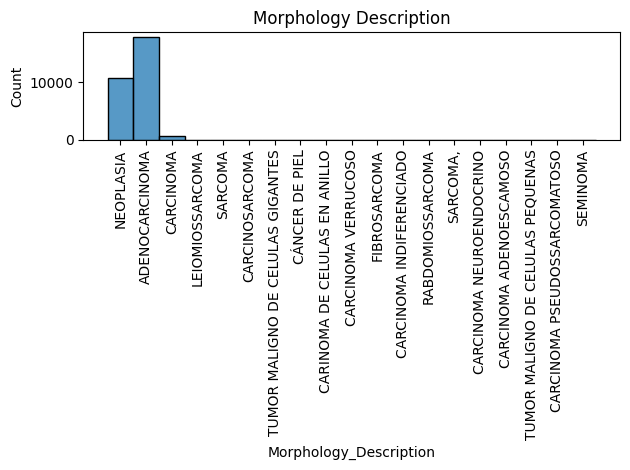

In [ ]:
sns.histplot(data=df_morto, x="Morphology_Description")

plt.title("Morphology Description", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

<ipython-input-135-ffa770d232d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto['TNM'] = df_morto['TNM'].astype(str)


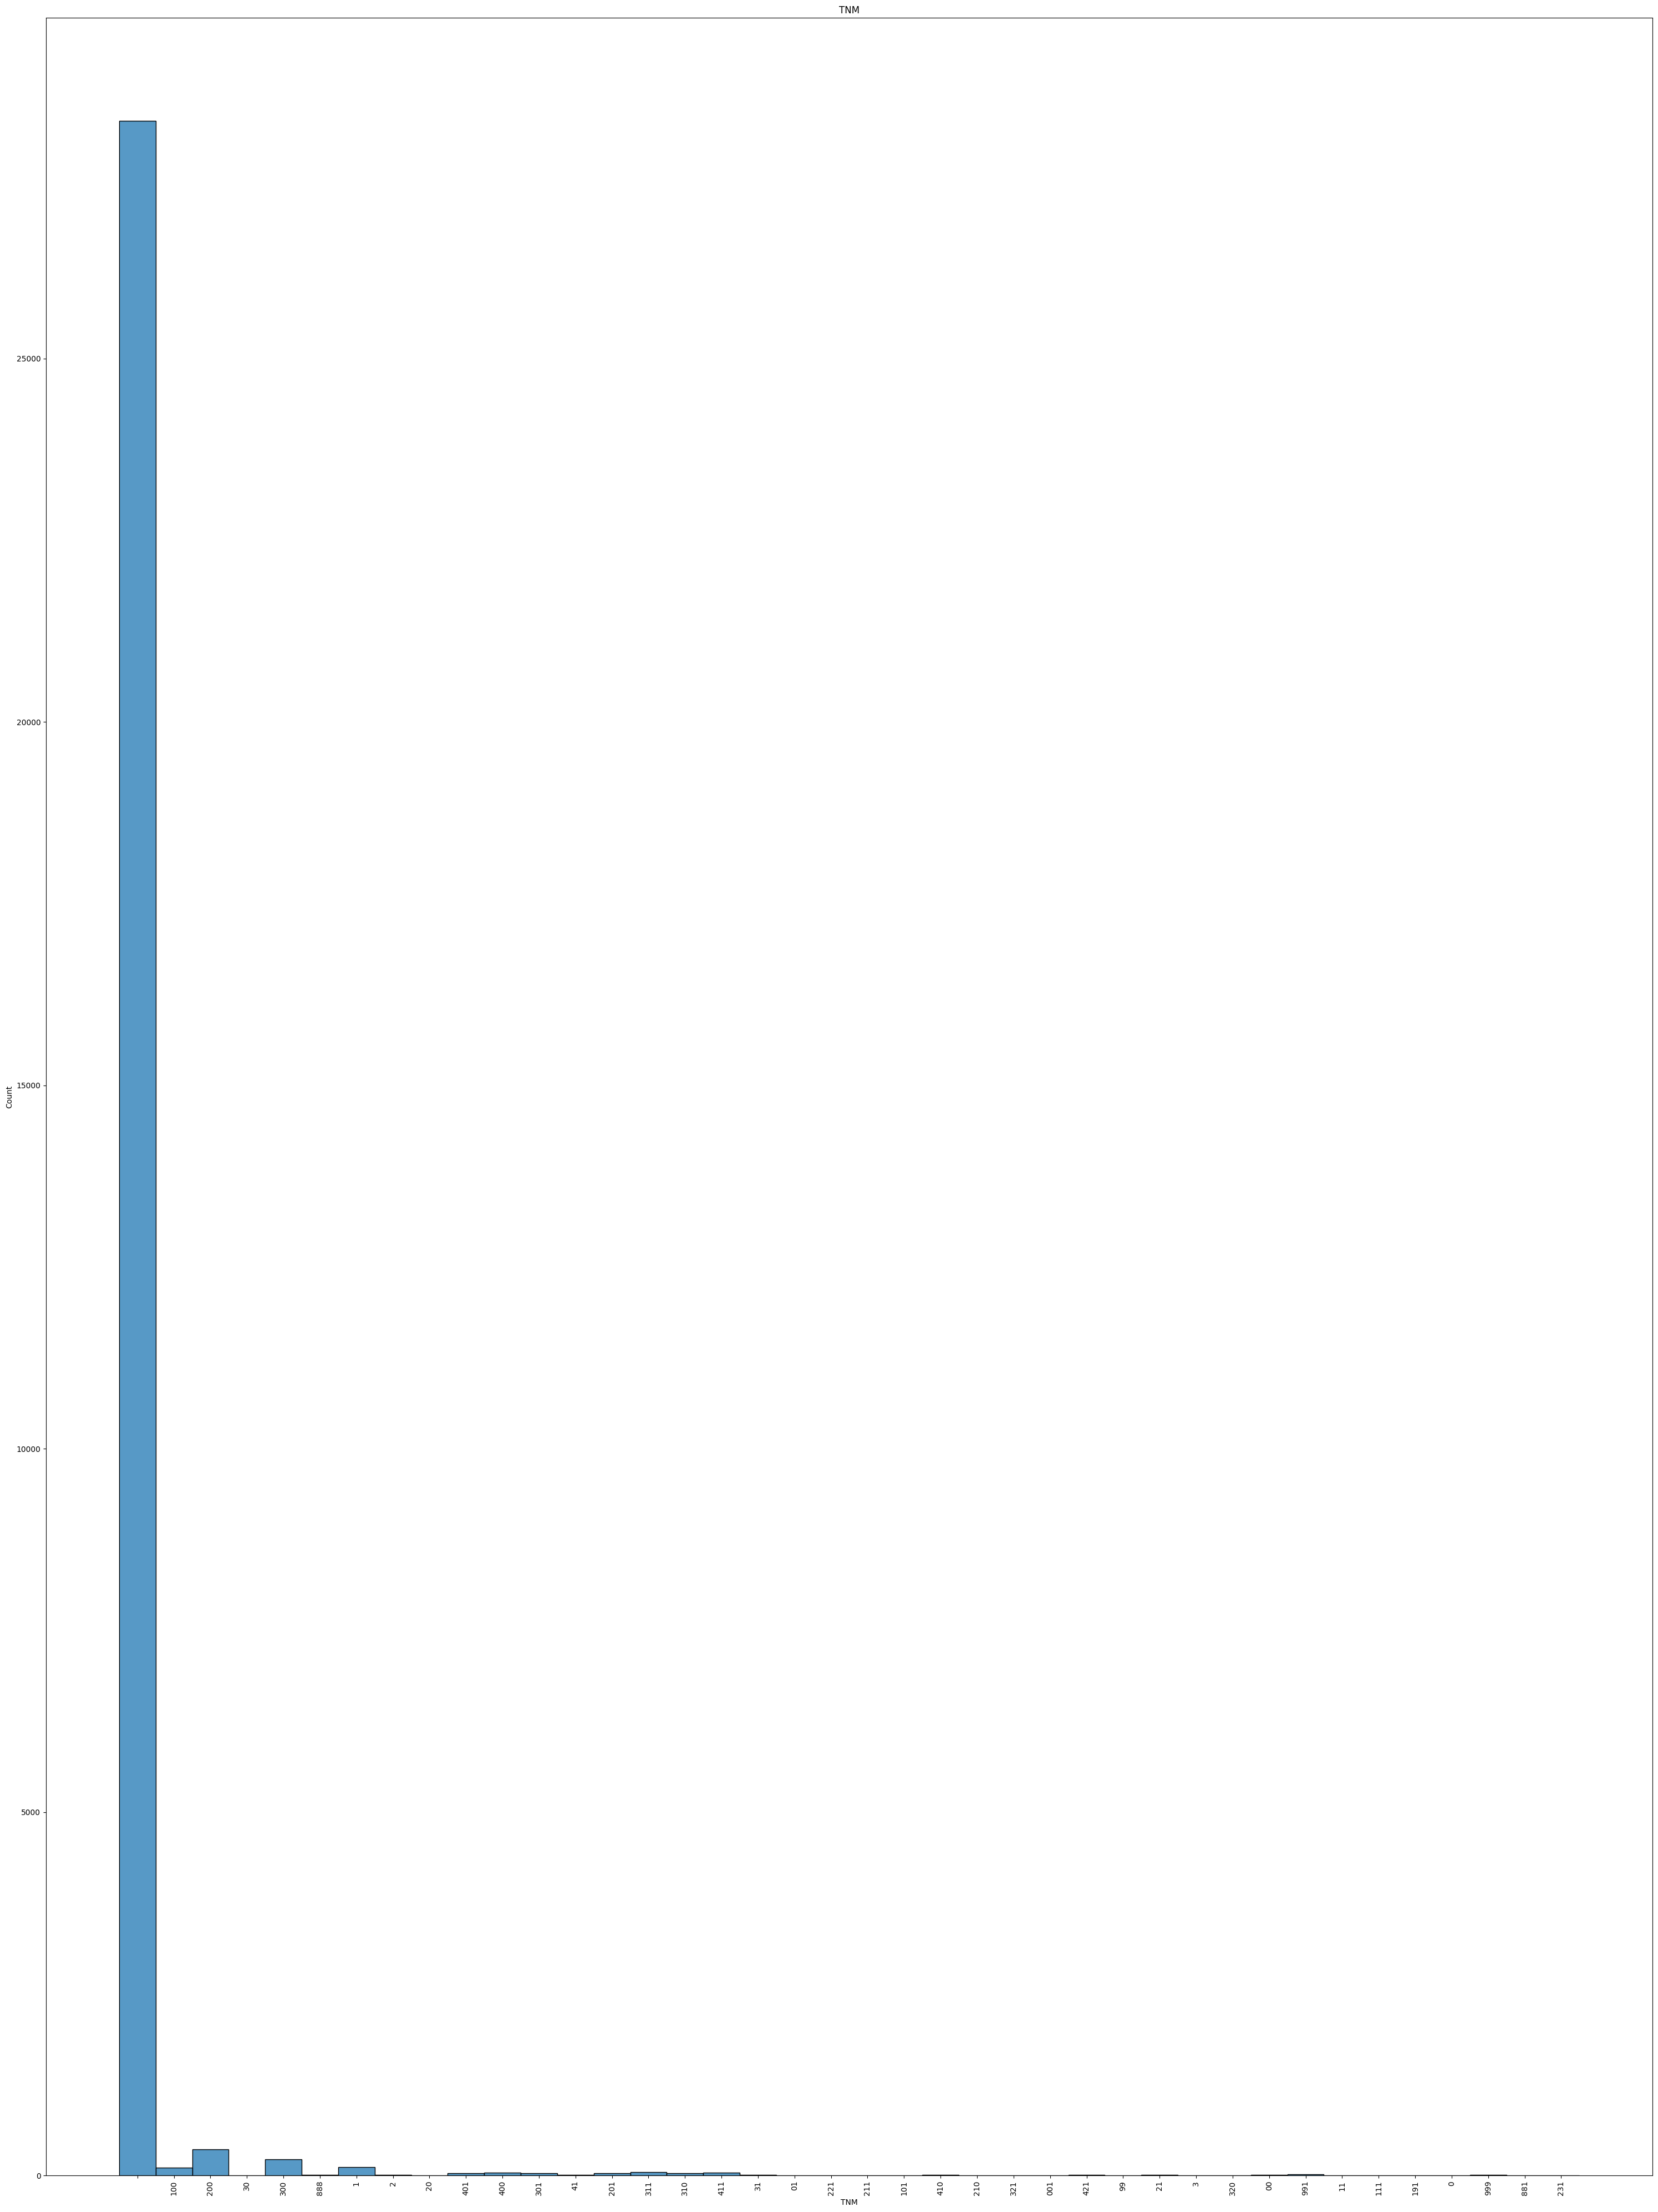

In [ ]:
df_morto['TNM'] = df_morto['TNM'].astype(str)
plt.figure(figsize=(30, 40))

sns.histplot(data=df_morto, x="TNM")

plt.title("TNM", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

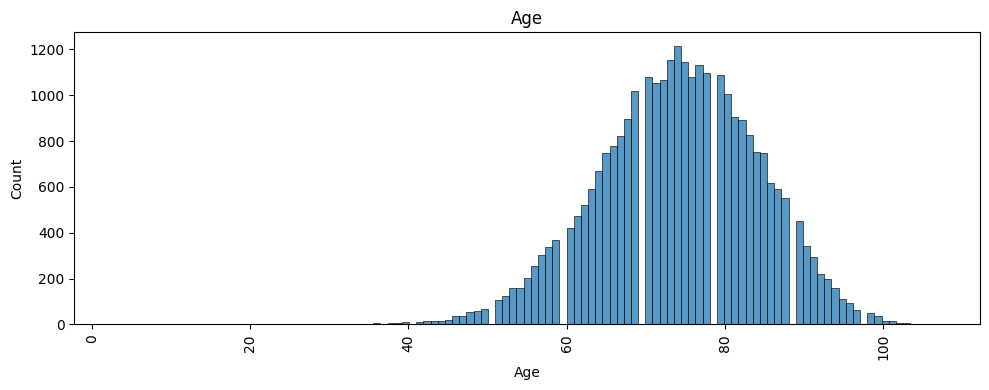

In [ ]:
plt.figure(figsize=(10, 4))

sns.histplot(data=df_morto, x="Age")

plt.title("Age", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [ ]:
df_morto['Age'].describe()

count    29399.000000
mean        74.024116
std         10.164622
min          3.000000
25%         67.000000
50%         74.000000
75%         81.000000
max        107.000000
Name: Age, dtype: float64

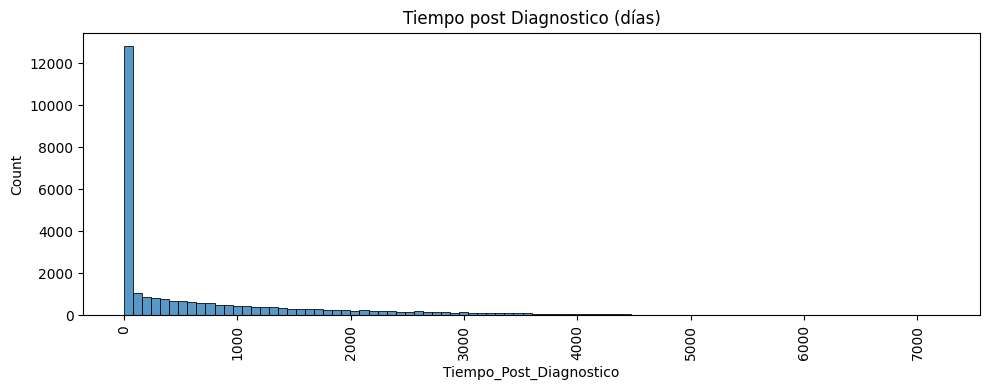

In [ ]:
plt.figure(figsize=(10, 4))

sns.histplot(data=df_morto, x="Tiempo_Post_Diagnostico")

plt.title("Tiempo post Diagnostico (días)", loc="center")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [ ]:
df_morto["Tiempo_Post_Diagnostico"].describe()

count    29444.000000
mean       811.560624
std       1164.476642
min          0.000000
25%          0.000000
50%        237.000000
75%       1244.000000
max       7192.000000
Name: Tiempo_Post_Diagnostico, dtype: float64

Análisis de correlación

In [ ]:
df_morto_encoded = pd.get_dummies(df_morto, columns=['Raca_Color'])

In [ ]:
df_morto["Raca_Color_n"] = pd.factorize(df_morto["Raca_Color"])[0]
df_morto["State_Civil_n"]= pd.factorize(df_morto["State_Civil"])[0]
df_morto["Name_Occupation_n"]= pd.factorize(df_morto["Name_Occupation"])[0]
df_morto["Morphology_Description_n"]= pd.factorize(df_morto["Morphology_Description"])[0]
df_morto["Extension_n"]= pd.factorize(df_morto["Extension"])[0]

<ipython-input-141-c9fbfa82878b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto["Raca_Color_n"] = pd.factorize(df_morto["Raca_Color"])[0]
<ipython-input-141-c9fbfa82878b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto["State_Civil_n"]= pd.factorize(df_morto["State_Civil"])[0]
<ipython-input-141-c9fbfa82878b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

<Axes: >

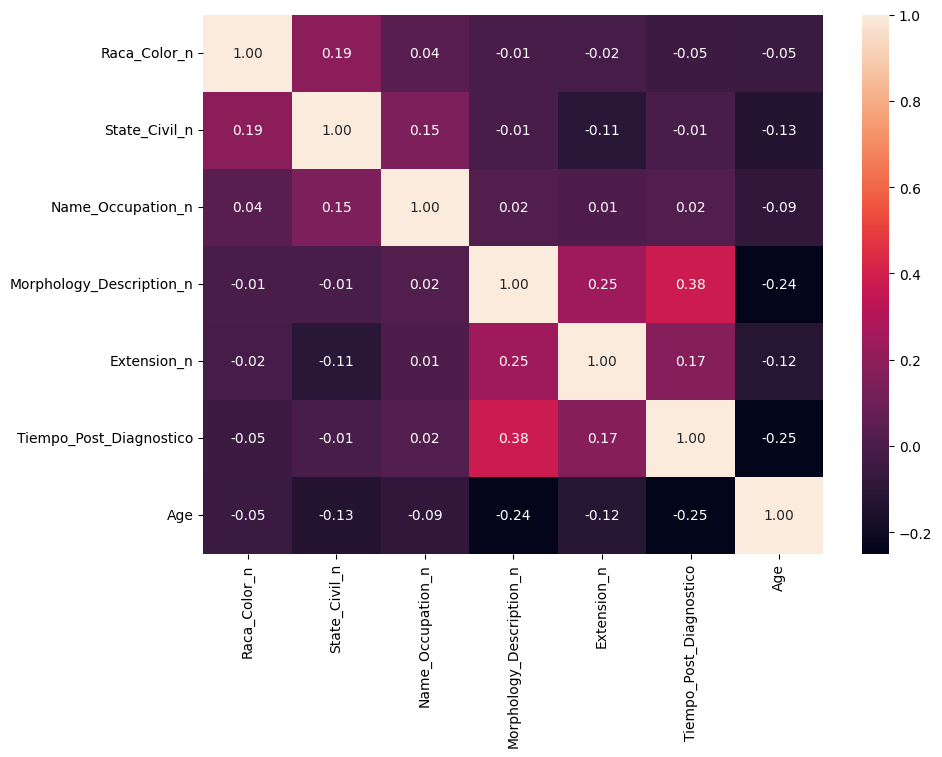

In [ ]:

fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(df_morto[["Raca_Color_n", "State_Civil_n", "Name_Occupation_n", "Morphology_Description_n", "Extension_n", "Tiempo_Post_Diagnostico", "Age"]].corr(), annot= True, fmt=".2f")

Existe una fuerte correlación entre La descripción de la morfología y el tiempo de vida, esto ya lo sabíamos, hay cánceres peores que otros. Además entre la extensión y el tipo de cancer (lo mismo). Además hay una correlación negativa entre la edad y el tiempo de vida y el tipo de cancer(descripcion of morphology)

Análisis categórico numérico

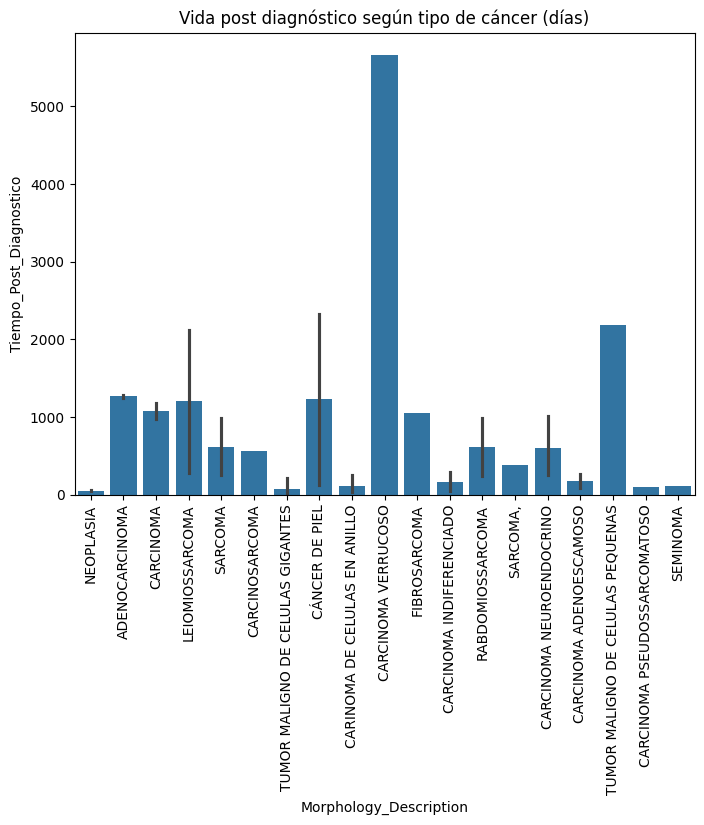

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Morphology_Description', y="Tiempo_Post_Diagnostico", data=df_morto,)
plt.title("Vida post diagnóstico según tipo de cáncer (días)")
plt.xticks(rotation=90)

plt.show()

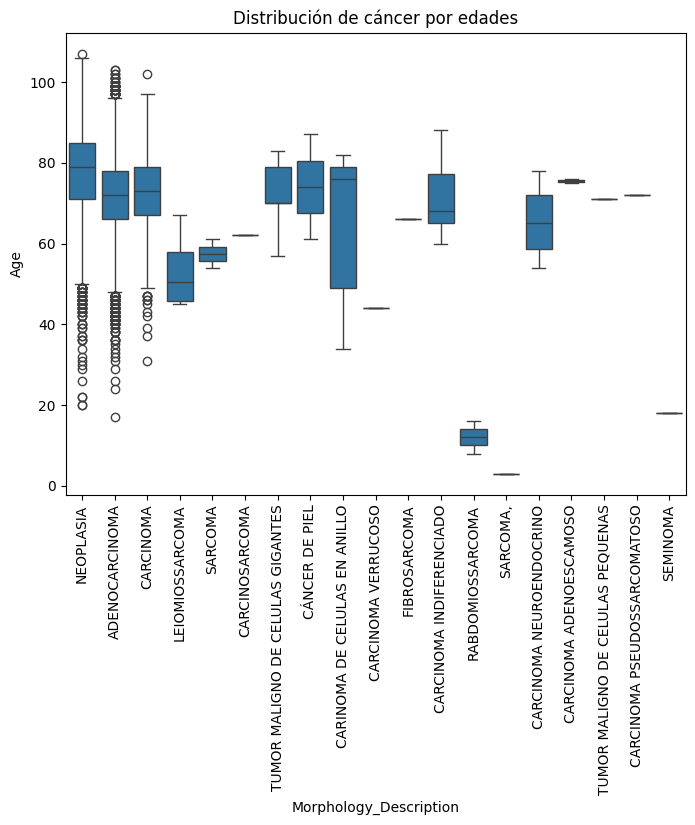

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Morphology_Description', y='Age', data=df_morto)
plt.title('Distribución de cáncer por edades')
plt.xticks(rotation=90)
plt.show()

La distribución nos muestra que la mayoría de canceres se inician entre los 40 y los 80 años(con medias superiores a los 60 años) a excepción de cánceres "juveniles" como los rabdiomiosarcoma, sarcoma y seminoma (este último relacionado con células madre)

Análisis numerico numerico

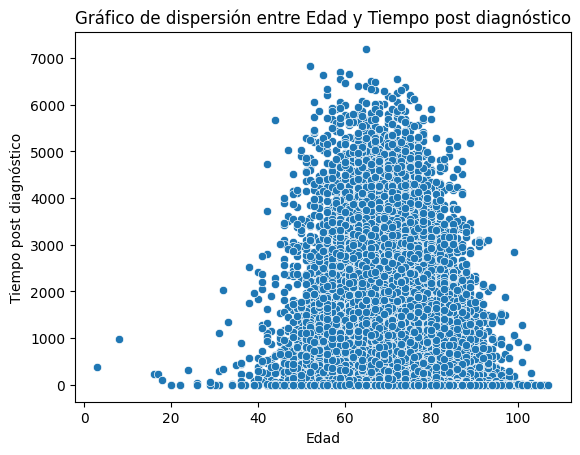

In [ ]:
sns.scatterplot(x='Age', y="Tiempo_Post_Diagnostico", data=df_morto)
plt.title('Gráfico de dispersión entre Edad y Tiempo post diagnóstico')
plt.xlabel('Edad')
plt.ylabel('Tiempo post diagnóstico')
plt.show()

Análisis multivariable

<ipython-input-146-5a9394f9ef04>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axis, data=df_morto, x="Age", y="Tiempo_Post_Diagnostico", hue="Morphology_Description", ci=None)


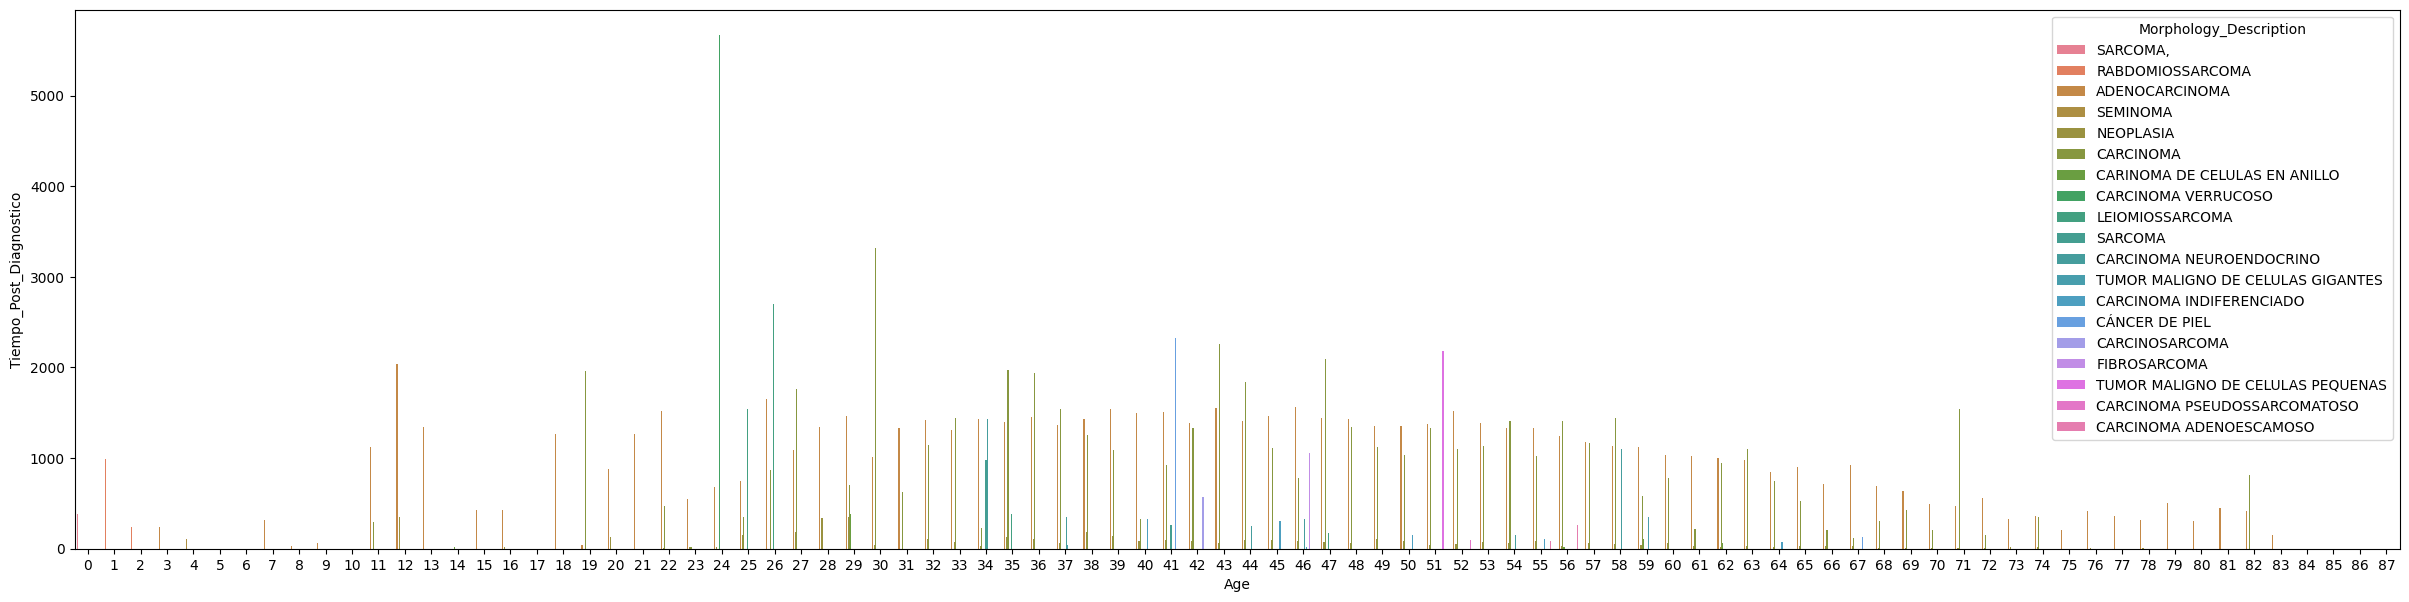

In [ ]:
fig, axis = plt.subplots(figsize = (30, 7), nrows= 1, ncols=1)

sns.barplot(ax=axis, data=df_morto, x="Age", y="Tiempo_Post_Diagnostico", hue="Morphology_Description", ci=None)
axis.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.show()

In [ ]:
mean_age = df_morto['Age'].mean()
df_morto['Age'] = df_morto['Age'].fillna(mean_age).astype(int)
df_morto['Age'] = df_morto['Age'].astype(int)
df_morto['Age_Group'] = pd.cut(df_morto['Age'], bins=range(0, df_morto['Age'].max() + 5, 5), right=False)

<ipython-input-147-2b3278c3e467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto['Age'] = df_morto['Age'].fillna(mean_age).astype(int)
<ipython-input-147-2b3278c3e467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto['Age'] = df_morto['Age'].astype(int)
<ipython-input-147-2b3278c3e467>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df_morto



Age Raca_Color Nationality Naturality_State  \
23       100        NaN      BRASIL     MINAS GERAIS   
73        72     BRANCO      BRASIL        SÃO PAULO   
94        78     BRANCO      BRASIL     MINAS GERAIS   
150       82     BRANCO      BRASIL        SÃO PAULO   
165       81      PRETA      BRASIL        SÃO PAULO   
...      ...        ...         ...              ...   
1759948   76        NaN      BRASIL              NaN   
1760023   55     BRANCO      BRASIL        SÃO PAULO   
1760027   70     BRANCO      BRASIL        SÃO PAULO   
1760031   73     BRANCO      BRASIL        SÃO PAULO   
1760056   59     BRANCO      BRASIL              NaN   

                 Degree_of_Education State_Civil  \
23                               NaN       VIÚVO   
73                               NaN      CASADO   
94                               NaN       VIÚVO   
150                              NaN      CASADO   
165                              NaN       VIÚVO   
...                              ...         ...   
1759948                          NaN         NaN   
1760023  MÉDIO (ANTIGO SEGUNDO GRAU)      CASADO   
1760027  MÉDIO (ANTIGO SEGUNDO GRAU)      CASADO   
1760031  MÉDIO (ANTIGO SEGUNDO GRAU)      CASADO   
1760056            SUPERIOR COMPLETO    SOLTEIRO   

                                           Name_Occupation Status_Address  \
23                    GERENTES DE PRODUÇÃO E OPERAÇÕES  \t      SÃO PAULO   
73       TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...      SÃO PAULO   
94                                        SEM INFORMAÇÃO\t      SÃO PAULO   
150                                       SEM INFORMAÇÃO\t      SÃO PAULO   
165                                       SEM INFORMAÇÃO\t      SÃO PAULO   
...                                                    ...            ...   
1759948                                                NaN      SÃO PAULO   
1760023  ELETRICISTAS ELETRÔNICOS DE MANUTENÇÃO INDUSTR...      SÃO PAULO   
1760027  ELETRICISTAS ELETRÔNICOS DE MANUTENÇÃO VEICULA...      SÃO PAULO   
1760031  AUXILIARES DE SERVIÇOS DE BIBLIOTECA, DOCUMENT...      SÃO PAULO   
1760056                       FÍSICOS, QUÍMICOS E AFINS \t      SÃO PAULO   

        Morphology_Description              Diagnostic_means  ...  \
23                   NEOPLASIA                           SDO  ...   
73                   NEOPLASIA                           SDO  ...   
94                   NEOPLASIA                           SDO  ...   
150                  NEOPLASIA                           SDO  ...   
165                  NEOPLASIA                           SDO  ...   
...                        ...                           ...  ...   
1759948         ADENOCARCINOMA  HISTOLOGIA DO TUMOR PRIMÁRIO  ...   
1760023         ADENOCARCINOMA  HISTOLOGIA DO TUMOR PRIMÁRIO  ...   
1760027         ADENOCARCINOMA  HISTOLOGIA DO TUMOR PRIMÁRIO  ...   
1760031         ADENOCARCINOMA  HISTOLOGIA DO TUMOR PRIMÁRIO  ...   
1760056         ADENOCARCINOMA  HISTOLOGIA DO TUMOR PRIMÁRIO  ...   

        Date_of_Diagnostic Distant_metastasis    year Tiempo_Post_Diagnostico  \
23              2000-05-18                NaN  2000.0                     0.0   
73              2003-04-24                NaN  2003.0                     0.0   
94              2000-06-19                NaN  2000.0                     0.0   
150             2005-07-05                NaN  2005.0                     0.0   
165             2001-08-30                NaN  2001.0                     0.0   
...                    ...                ...     ...                     ...   
1759948         2009-06-02                NaN  2009.0                   588.0   
1760023         2009-01-15                NaN  2009.0                  2257.0   
1760027         2009-05-15                NaN  2009.0                  2015.0   
1760031         2009-03-30                NaN  2009.0                  1478.0   
1760056         2009-09-24                NaN  2009.0             

<ipython-input-149-11a2c8d24228>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axis, data=df_morto, x="Age_Group", y="Tiempo_Post_Diagnostico", hue="Morphology_Description", ci=None)


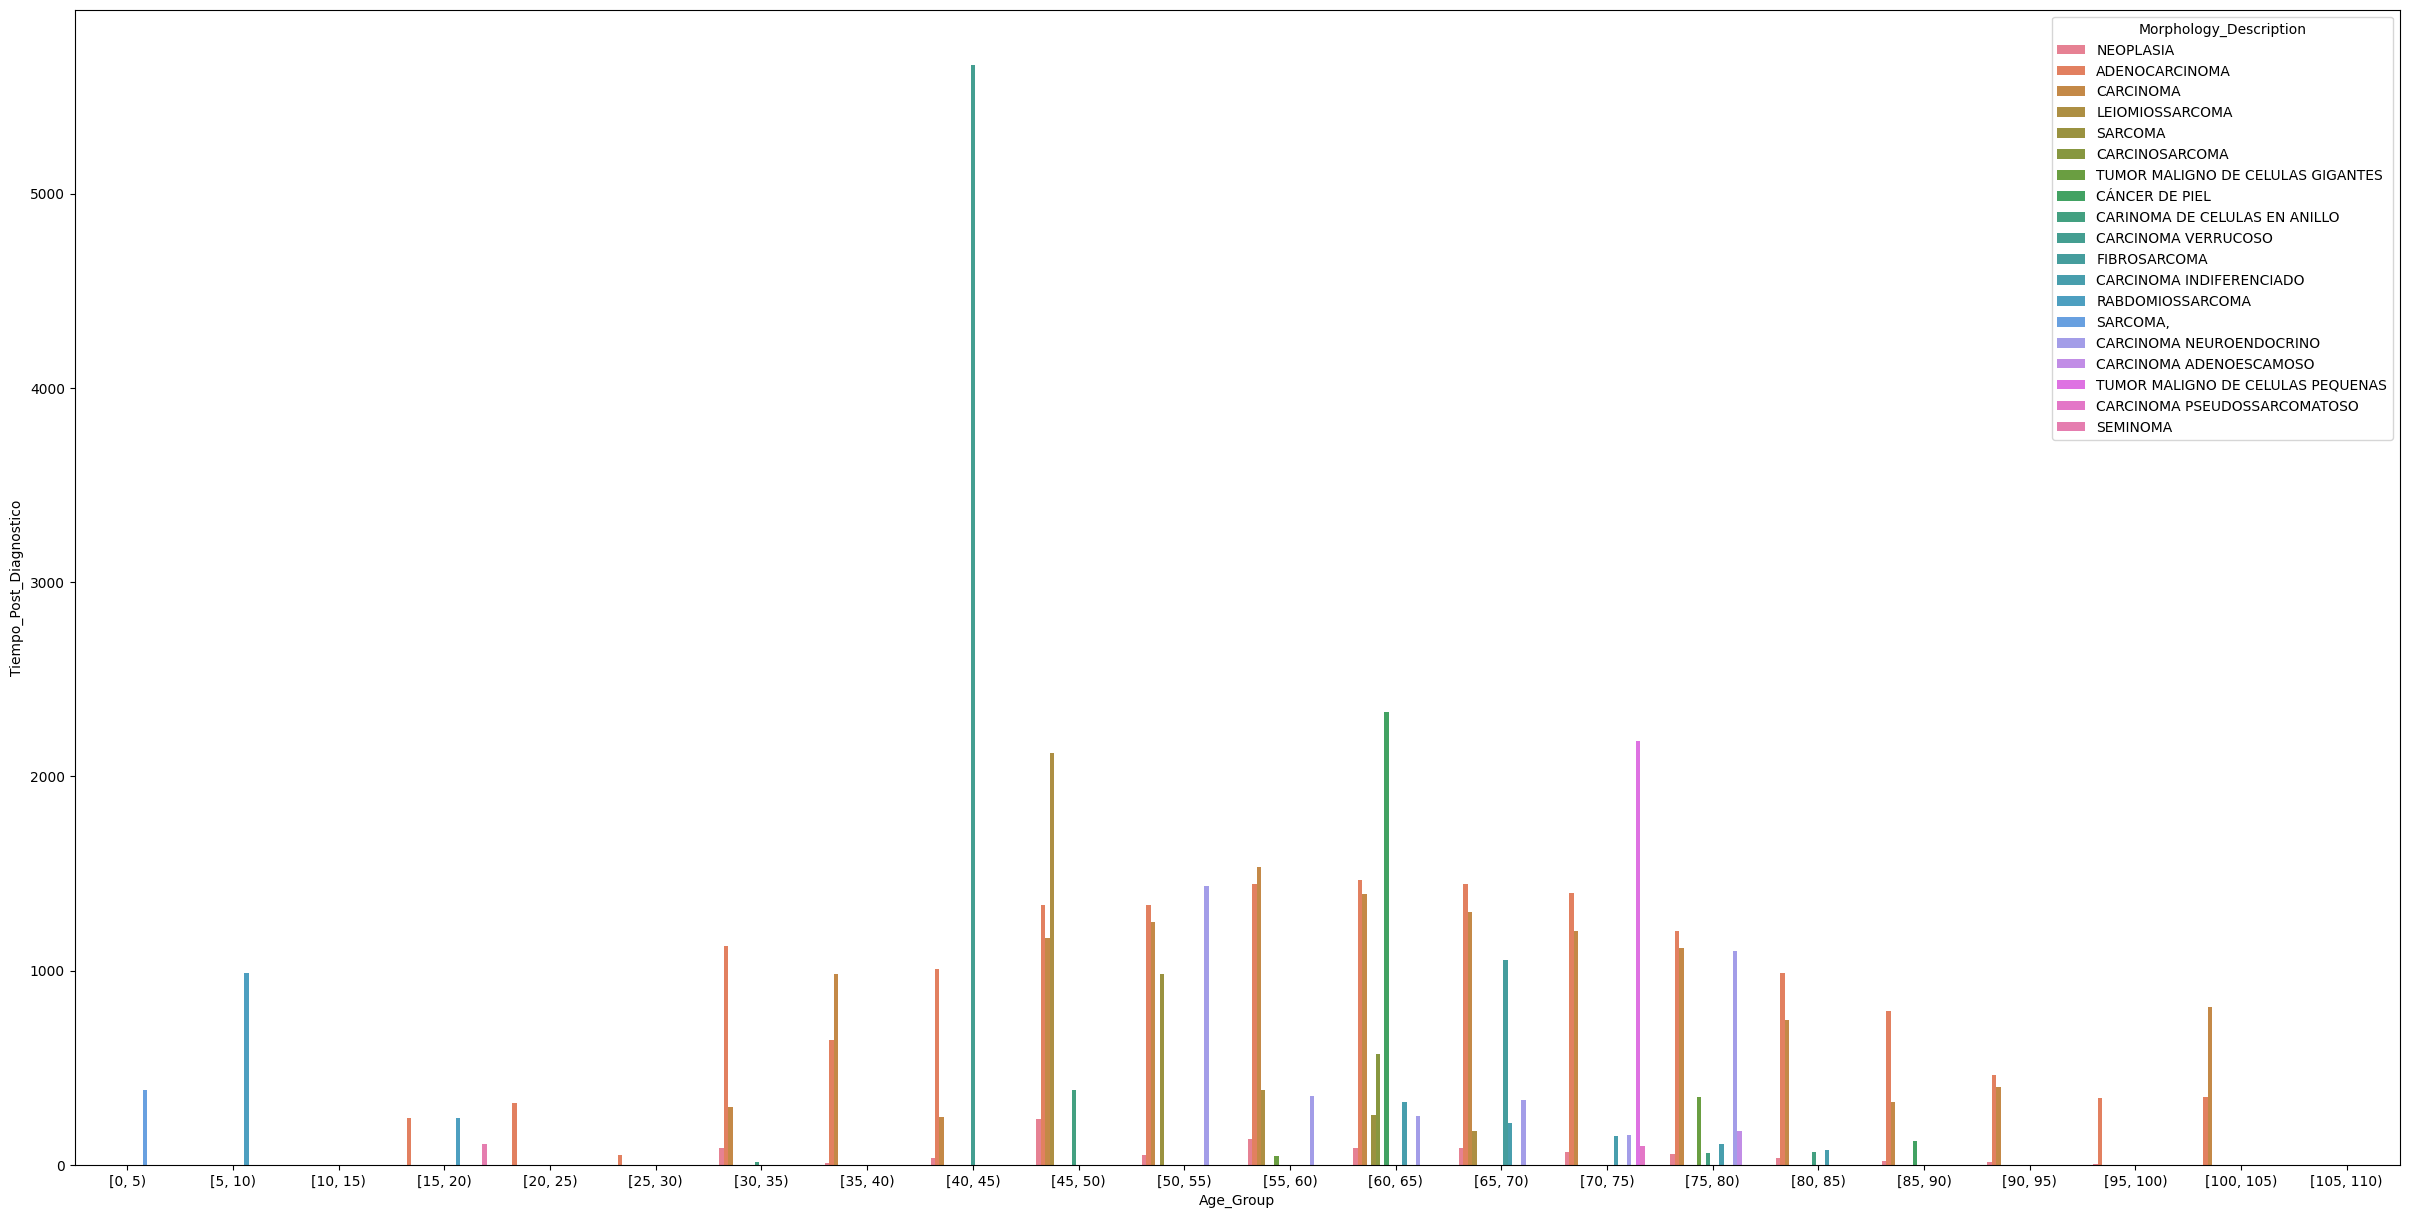

In [ ]:
fig, axis = plt.subplots(figsize = (30, 15), nrows= 1, ncols=1)

sns.barplot(ax=axis, data=df_morto, x="Age_Group", y="Tiempo_Post_Diagnostico", hue="Morphology_Description", ci=None)

plt.show()

Creo un df nuevo coon los datos de prediccion

In [ ]:
#64
df_morto_pred= df_morto.drop(columns=["Name_Occupation", "Naturality_State", "Degree_of_Education", "Date_of_Diagnostic", "year", "Age_Group", "Raca_Color_n", "State_Civil_n", "Name_Occupation_n", "Morphology_Description_n", "Extension_n", "Date_of_Death", "Status_Vital", "Type_of_Death", "Statement", "Status_Address", "Distant_metastasis"])

In [ ]:
#65
df_morto_pred

Age Raca_Color Nationality State_Civil Morphology_Description  \
23       100        NaN      BRASIL       VIÚVO              NEOPLASIA   
73        72     BRANCO      BRASIL      CASADO              NEOPLASIA   
94        78     BRANCO      BRASIL       VIÚVO              NEOPLASIA   
150       82     BRANCO      BRASIL      CASADO              NEOPLASIA   
165       81      PRETA      BRASIL       VIÚVO              NEOPLASIA   
...      ...        ...         ...         ...                    ...   
1759948   76        NaN      BRASIL         NaN         ADENOCARCINOMA   
1760023   55     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760027   70     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760031   73     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760056   59     BRANCO      BRASIL    SOLTEIRO         ADENOCARCINOMA   

                     Diagnostic_means   Extension TNM  Tiempo_Post_Diagnostico  
23                                SDO         NaN                          0.0  
73                                SDO         NaN                          0.0  
94                                SDO   METÁSTASE                          0.0  
150                               SDO   METÁSTASE                          0.0  
165                               SDO         NaN                          0.0  
...                               ...         ...  ..                      ...  
1759948  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                        588.0  
1760023  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       2257.0  
1760027  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO                       2015.0  
1760031  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO                       1478.0  
1760056  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       4259.0  

[29446 rows x 9 columns]

Tengo que factorizar todos los cualitativos y para hacerlo voy a volver a graficar todos los cualitativos para poder ver que numero han obtenido

Voy a rellenar los Nans utilizando K nearest, la razon es que neceito que columnas como TNM se rellenen basandose en datos parecidos y no en estadisticos

In [ ]:
#66
df_morto_pred.isna().sum()



Age                            0
Raca_Color                  3508
Nationality                 5307
State_Civil                 6881
Morphology_Description         0
Diagnostic_means             446
Extension                  20761
TNM                            0
Tiempo_Post_Diagnostico        2
dtype: int64

In [ ]:
#67
df_morto_2 = df_morto_pred[df_morto_pred["Tiempo_Post_Diagnostico"] != 0]
df_morto_2 = df_morto_2.dropna(subset=["Tiempo_Post_Diagnostico"])


In [ ]:
#68
df_morto_2

Age Raca_Color Nationality State_Civil Morphology_Description  \
319       85        NaN         NaN         NaN         ADENOCARCINOMA   
328       70        NaN         NaN         NaN              CARCINOMA   
333       75     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
385       82     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
425       68        NaN         NaN         NaN         ADENOCARCINOMA   
...      ...        ...         ...         ...                    ...   
1759948   76        NaN      BRASIL         NaN         ADENOCARCINOMA   
1760023   55     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760027   70     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760031   73     BRANCO      BRASIL      CASADO         ADENOCARCINOMA   
1760056   59     BRANCO      BRASIL    SOLTEIRO         ADENOCARCINOMA   

                     Diagnostic_means   Extension TNM  Tiempo_Post_Diagnostico  
319      HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       1337.0  
328      HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       1351.0  
333      HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                        785.0  
385      HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO                       1193.0  
425      HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                        280.0  
...                               ...         ...  ..                      ...  
1759948  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                        588.0  
1760023  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       2257.0  
1760027  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO                       2015.0  
1760031  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO                       1478.0  
1760056  HISTOLOGIA DO TUMOR PRIMÁRIO         NaN                       4259.0  

[18695 rows x 9 columns]

In [ ]:
#69
df_morto_2.isna().sum()

Age                            0
Raca_Color                  2212
Nationality                 3062
State_Civil                 4480
Morphology_Description         0
Diagnostic_means             258
Extension                  11364
TNM                            0
Tiempo_Post_Diagnostico        0
dtype: int64

In [ ]:
df_morto_2["TNM"] = df_morto_2["TNM"].replace("", np.nan)

<ipython-input-156-687c34498b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morto_2["TNM"] = df_morto_2["TNM"].replace("", np.nan)


In [ ]:
#70
categorical_cols_with_na = ["Raca_Color", "Nationality", "State_Civil", "Diagnostic_means", "Extension", "TNM"]
df_categorical = df_morto_2[categorical_cols_with_na].copy()

# Verificar que se ha creado correctamente
print(df_categorical.isnull().sum())

Raca_Color           2212
Nationality          3062
State_Civil          4480
Diagnostic_means      258
Extension           11364
TNM                 17524
dtype: int64


In [ ]:
#71
# Paso 1: Convertir categorías a números
mappings = {}
for col in df_categorical.columns:
    uniques = df_categorical[col].dropna().unique().tolist()
    mapping = {category: idx for idx, category in enumerate(uniques)}
    reverse_mapping = {idx: category for category, idx in mapping.items()}
    mappings[col] = (mapping, reverse_mapping)

    # Mapear las categorías a índices numéricos, dejando los NaN como están
    df_categorical[col] = df_categorical[col].map(mapping)

# Paso 2: Usar KNN para imputar los valores faltantes
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_array = knn_imputer.fit_transform(df_categorical)

# Convertir el resultado imputado a DataFrame
df_categorical_imputed = pd.DataFrame(imputed_array, columns=df_categorical.columns)

# Paso 3: Reconstruir las categorías originales
for col in df_categorical_imputed.columns:
    _, reverse_mapping = mappings[col]
    df_categorical_imputed[col] = df_categorical_imputed[col].round().astype(int).map(reverse_mapping)

# Verificar si los valores faltantes han sido eliminados
print(df_categorical_imputed.isnull().sum())


Raca_Color          0
Nationality         0
State_Civil         0
Diagnostic_means    0
Extension           0
TNM                 0
dtype: int64


In [ ]:
#72
df_categorical_imputed

Raca_Color Nationality State_Civil              Diagnostic_means  \
0          PARDA      BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   
1          PARDA      BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   
2         BRANCO      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
3         BRANCO      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
4          PARDA      BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   
...          ...         ...         ...                           ...   
18690      PARDA      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
18691     BRANCO      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
18692     BRANCO      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
18693     BRANCO      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO   
18694     BRANCO      BRASIL    SOLTEIRO  HISTOLOGIA DO TUMOR PRIMÁRIO   

        Extension  TNM  
0       METÁSTASE    2  
1       METÁSTASE    2  
2      LOCALIZADO  300  
3      LOCALIZADO  888  
4       METÁSTASE    2  
...           ...  ...  
18690  LOCALIZADO    2  
18691  LOCALIZADO  300  
18692  LOCALIZADO  888  
18693  LOCALIZADO  888  
18694  LOCALIZADO   30  

[18695 rows x 6 columns]

In [ ]:
#73 Paso 1: Asegurarse de que los índices de df_categorical_imputed coincidan con df_morto_2
df_categorical_imputed.index = df_categorical.index  # Igualar los índices al original

# Paso 2: Eliminar las columnas originales de df_morto_2
df_morto_2 = df_morto_2.drop(columns=categorical_cols_with_na)

# Paso 3: Fusionar los DataFrames
df_morto_2 = pd.concat([df_morto_2, df_categorical_imputed], axis=1)

# Paso 4: Verificar las dimensiones finales
print(f"Dimensiones finales del DataFrame: {df_morto_2.shape}")  # Debería ser (18498, <número total de columnas>)


Dimensiones finales del DataFrame: (18695, 9)


In [ ]:
#74
df_morto_2.isna().sum()

Age                        0
Morphology_Description     0
Tiempo_Post_Diagnostico    0
Raca_Color                 0
Nationality                0
State_Civil                0
Diagnostic_means           0
Extension                  0
TNM                        0
dtype: int64

In [ ]:
#75
replacement_TNM = {
    "0": "000",
    "00": "000",
    "1": "100",
    "01": "010",
    "11": "110",
    "2": "200",
    "20": "200",
    "21": "210",
    "3": "300",
    "30": "300",
    "31": "310",
    "41": "410",
    "99": "990"
}

df_morto_2['TNM'] = df_morto_2['TNM'].replace(replacement_TNM)
df_morto_2

Age Morphology_Description  Tiempo_Post_Diagnostico Raca_Color  \
319       85         ADENOCARCINOMA                   1337.0      PARDA   
328       70              CARCINOMA                   1351.0      PARDA   
333       75         ADENOCARCINOMA                    785.0     BRANCO   
385       82         ADENOCARCINOMA                   1193.0     BRANCO   
425       68         ADENOCARCINOMA                    280.0      PARDA   
...      ...                    ...                      ...        ...   
1759948   76         ADENOCARCINOMA                    588.0      PARDA   
1760023   55         ADENOCARCINOMA                   2257.0     BRANCO   
1760027   70         ADENOCARCINOMA                   2015.0     BRANCO   
1760031   73         ADENOCARCINOMA                   1478.0     BRANCO   
1760056   59         ADENOCARCINOMA                   4259.0     BRANCO   

        Nationality State_Civil              Diagnostic_means   Extension  TNM  
319          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
328          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
333          BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  300  
385          BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  
425          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
...             ...         ...                           ...         ...  ...  
1759948      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  200  
1760023      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  300  
1760027      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  
1760031      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  
1760056      BRASIL    SOLTEIRO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  300  

[18695 rows x 9 columns]

In [ ]:
#76
X= df_morto_2.drop("Tiempo_Post_Diagnostico", axis=1)
y= df_morto_2["Tiempo_Post_Diagnostico"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#77
# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

# Diccionario para almacenar los mapeos
factorize_mappings = {}

# Combinar X_train y X_test para factorizarlos juntos
X_combined = pd.concat([X_train, X_test], axis=0)

# Factorizar las columnas categóricas y almacenar los mapeos
for col in categorical_cols:
    X_combined[col], uniques = pd.factorize(X_combined[col], sort=True)
    factorize_mappings[col] = dict(enumerate(uniques))

# Separar nuevamente en X_train y X_test
X_train = X_combined.loc[X_train.index]
X_test = X_combined.loc[X_test.index]

In [ ]:
#78 Verificar los mapeos
print("Mapeo de Nationality:", factorize_mappings['Nationality'])
print("Mapeo de Raca_Color:", factorize_mappings['Raca_Color'])
print("Mapeo de State_Civil:", factorize_mappings["State_Civil"])
print("Mapeo de Diagnostic_means:", factorize_mappings['Diagnostic_means'])
print("Mapeo de Extension:", factorize_mappings['Extension'])
print("Mapeo de TNM:", factorize_mappings['TNM'])
print("Mapeo de Morphology_Description:", factorize_mappings['Morphology_Description'])

Mapeo de Nationality: {0: 'ANGOLA', 1: 'ARGENTINA', 2: 'BOLIVIA', 3: 'BRASIL', 4: 'CHILE', 5: 'CHINA', 6: 'DINAMARCA', 7: 'ESPANHA', 8: 'ESTADOS UNIDOS DA AMERICA', 9: 'FAIXA DE GAZA (PALESTINA)', 10: 'FRANCA', 11: 'GUATEMALA', 12: 'HOLANDA', 13: 'ITALIA', 14: 'IUGOSLAVIA', 15: 'JAPAO', 16: 'LIBANO', 17: 'PARAGUAI', 18: 'PERU', 19: 'POLONIA', 20: 'PORTUGAL', 21: 'REINO UNIDO', 22: 'REP. FEDERAL DA ALEMANHA', 23: 'REP. ISLAMICA DO IRA', 24: 'REP. SOC. SOVIETICA DA UCRANIA', 25: 'SUICA', 26: 'TURQUIA', 27: 'UNIAO DAS REP. SOC. SOVIETICAS', 28: 'URUGUAI', 29: 'VENEZUELA'}
Mapeo de Raca_Color: {0: 'AMARELA', 1: 'BRANCO', 2: 'INDÍGENA', 3: 'PARDA', 4: 'PRETA'}
Mapeo de State_Civil: {0: 'CASADO', 1: 'SEPARADO JUDICIALMENTE', 2: 'SOLTEIRO', 3: 'UNIÃO CONSENSUAL', 4: 'VIÚVO'}
Mapeo de Diagnostic_means: {0: 'CITOLOGIA', 1: 'CLÍNICO', 2: 'HISTOLOGIA DA METÁSTASE', 3: 'HISTOLOGIA DO TUMOR PRIMÁRIO', 4: 'MARCADORES TUMORAIS', 5: 'PESQUISA', 6: 'SDO'}
Mapeo de Extension: {0: 'IN SITU', 1: 'LOCALIZA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age']

# Crear el escalador
scaler = MinMaxScaler()

# Ajustar el escalador solo con los datos de entrenamiento
scaler.fit(X_train[columns_to_scale])

# Transformar tanto train como test
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Confirmar que solo se escaló la columna 'Age'
print(X_test.head())

         Age  Morphology_Description  Raca_Color  Nationality  State_Civil  \
442446  0.81                       0           1            3            0   
654356  0.69                       0           3            3            0   
372057  0.61                       0           1            3            4   
605507  0.80                       0           1            3            0   
529852  0.62                       0           1            3            0   

        Diagnostic_means  Extension  TNM  
442446                 3          1   14  
654356                 3          1   14  
372057                 3          2   26  
605507                 3          1   14  
529852                 3          1   14  


In [ ]:
#79
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#80
y_pred = model.predict(X_test)
y_pred

array([1162.7723828 ,  770.42043529, 1106.72911039, ..., 1069.41836329,
       1255.19702886,  358.63216667])

In [ ]:
#81
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 953.210076244288
RMSE: 1242.356544682975
R2: -0.00018942643350583488


In [ ]:
#82
X_train2= X_train[['Extension',"Morphology_Description"]]
X_train2

Extension  Morphology_Description
1679551          1                       0
1215104          2                       0
559999           2                       0
706047           1                       0
1315703          1                       0
...            ...                     ...
838480           1                       0
1230408          2                       0
553326           1                       0
387805           2                       0
1511894          2                       0

[14956 rows x 2 columns]

In [ ]:
#83
X_test2= X_test[['Extension',"Morphology_Description"]]
X_test2

Extension  Morphology_Description
442446           1                       0
654356           1                       0
372057           2                       0
605507           1                       0
529852           1                       0
...            ...                     ...
492657           0                      12
828395           1                       0
656213           1                       0
1364358          2                       0
1626120          2                       0

[3739 rows x 2 columns]

In [ ]:
#84
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train2, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#85
y_pred2 = rf.predict(X_test2)


In [ ]:
#86
mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
r2 = r2_score(y_test, y_pred2)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 942.5422970829038
RMSE: 1212.1301183799176
R2: 0.047887559686724646


Las metricas del RF han salido fatal, intento tener en cuenta las relaciones más significativas por el mapa de calor pero no mejoran. Como puede ser que la relacion entre las variables sean mas complejas, voy a ver si con XBoost me da mejores resultados

In [ ]:
#87
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación del modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Absolute Error (MAE): 923.9059858388459
Root Mean Squared Error (RMSE): 1198.178703651201
R² Score: 0.06967873697705995


In [ ]:
#88
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train2, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test2)

# Evaluación del modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Absolute Error (MAE): 943.1971224702976
Root Mean Squared Error (RMSE): 1214.1973123418493
R² Score: 0.044637282567093206


Con todas las caracteristicas mejora el modelo, lo que quiere decir que aunque no lo parezca, el resto de caracteristicas aportan algo al modelo.

Las mejores metricas las dan el RF con 2 variables más importantes y el XBoost con todas las variables. CVoy a probar a optimizar ambos modelos a la vez y si no encuentro buenas metricas tengo que empezar a combinar variables

In [ ]:
#89. RF dos características, optimizado:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)

# Entrenar con X_train2
grid_rf.fit(X_train2, y_train)

# Mejor modelo y evaluación
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test2)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Mejores hiperparámetros: {grid_rf.best_params_}")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest:
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
MAE: 942.0268415958681
RMSE: 1211.2514197143842
R² Score: 0.04926747208449589


In [ ]:
#90
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Espacio de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

# Variables para almacenar los mejores resultados
best_params = None
best_model = None
best_r2 = -np.inf  # R² más alto es mejor

# Bucle para probar combinaciones de hiperparámetros
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for subsample in param_grid['subsample']:
                # Crear el modelo
                model = XGBRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    subsample=subsample,
                    random_state=42
                )
                # Entrenar el modelo
                model.fit(X_train, y_train)
                # Predicciones
                y_pred = model.predict(X_test)
                # Evaluación
                r2 = r2_score(y_test, y_pred)
                # Actualizar el mejor modelo si es necesario
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'subsample': subsample
                    }
                    best_model = model

# Resultados finales
print("Mejores hiperparámetros:", best_params)
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE: {mae_best}")
print(f"RMSE: {rmse_best}")
print(f"R² Score: {r2_best}")


Mejores hiperparámetros: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'subsample': 0.8}
MAE: 910.5887351947916
RMSE: 1176.9330588366054
R² Score: 0.10237843347896358


Los datos van mejorando pero la desviación es aun muy grande (casi 3 años xD) y el r2 aun esta en un 10%.
La estrategia que voy a seguir antes de hacer ingenieria de caracteristicas es hacer una validación cruzada para asegurarme que el problema no esta en la division de train y test. Después, si ese no se demuestra el problema empezaré a jugar con las variables.

la RMSE de 16 dias me parece correcta

In [ ]:
#92
tiempo_post = df_morto_2['Tiempo_Post_Diagnostico']

# Métricas estadísticas
mean = tiempo_post.mean()
median = tiempo_post.median()
std_dev = tiempo_post.std()
min_value = tiempo_post.min()
max_value = tiempo_post.max()

print(f"Métrica de Tiempo_Post_Diagnostico:")
print(f"Media: {mean:.2f} días")
print(f"Mediana: {median:.2f} días")
print(f"Desviación Estándar: {std_dev:.2f} días")
print(f"Valor mínimo: {min_value} días")
print(f"Valor máximo: {max_value} días")

Métrica de Tiempo_Post_Diagnostico:
Media: 1278.18 días
Mediana: 884.00 días
Desviación Estándar: 1240.66 días
Valor mínimo: 1.0 días
Valor máximo: 7192.0 días


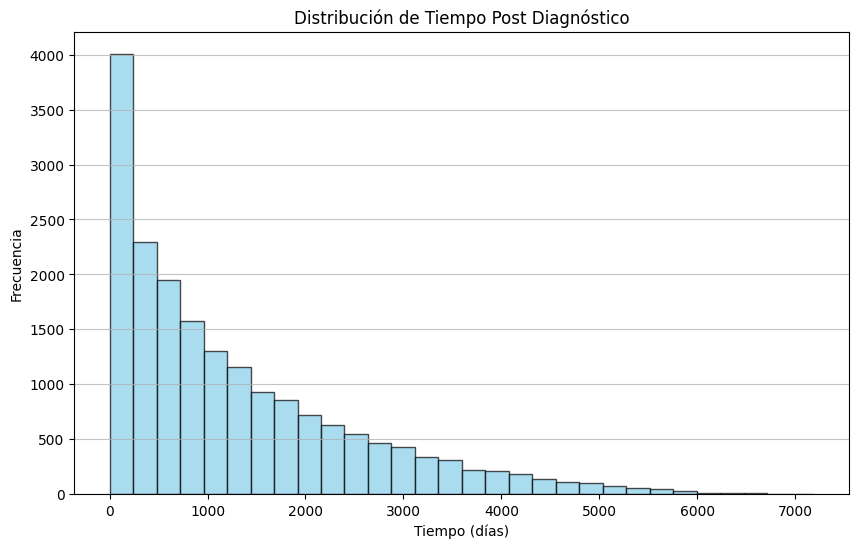

In [ ]:
#93
plt.figure(figsize=(10, 6))
plt.hist(tiempo_post, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Tiempo Post Diagnóstico')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
#94


In [ ]:
#95
df_morto_2.describe()

Age  Tiempo_Post_Diagnostico
count  18695.000000             18695.000000
mean      71.724632              1278.180850
std        9.535933              1240.664598
min        3.000000                 1.000000
25%       65.500000               305.000000
50%       72.000000               884.000000
75%       78.000000              1901.500000
max      103.000000              7192.000000

In [ ]:
#96
upper_limit5 = df_morto_2["Tiempo_Post_Diagnostico"].quantile(0.95)
lower_limit5 = df_morto_2["Tiempo_Post_Diagnostico"].quantile(0.05)
print(f"Umbral para el percentil 5%: {lower_limit5} días")
print(f"Umbral para el percentil 99: {upper_limit5} días")



Umbral para el percentil 5%: 22.0 días
Umbral para el percentil 99: 3870.2999999999993 días


In [ ]:
#97
filtered_df5 = df_morto_2[(df_morto_2['Tiempo_Post_Diagnostico'] >= lower_limit5) & (df_morto_2['Tiempo_Post_Diagnostico'] <= upper_limit5)]
print(f"Tamaño original del DataFrame: {df_morto_2.shape[0]} filas")
print(f"Tamaño después de filtrar outliers: {filtered_df5.shape[0]} filas")

Tamaño original del DataFrame: 18695 filas
Tamaño después de filtrar outliers: 16831 filas


In [ ]:
#98
filtered_df5

Age Morphology_Description  Tiempo_Post_Diagnostico Raca_Color  \
319       85         ADENOCARCINOMA                   1337.0      PARDA   
328       70              CARCINOMA                   1351.0      PARDA   
333       75         ADENOCARCINOMA                    785.0     BRANCO   
385       82         ADENOCARCINOMA                   1193.0     BRANCO   
425       68         ADENOCARCINOMA                    280.0      PARDA   
...      ...                    ...                      ...        ...   
1759938   70         ADENOCARCINOMA                    151.0      PARDA   
1759948   76         ADENOCARCINOMA                    588.0      PARDA   
1760023   55         ADENOCARCINOMA                   2257.0     BRANCO   
1760027   70         ADENOCARCINOMA                   2015.0     BRANCO   
1760031   73         ADENOCARCINOMA                   1478.0     BRANCO   

        Nationality State_Civil              Diagnostic_means   Extension  TNM  
319          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
328          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
333          BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  300  
385          BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  
425          BRASIL       VIÚVO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  200  
...             ...         ...                           ...         ...  ...  
1759938      BRASIL    SOLTEIRO  HISTOLOGIA DO TUMOR PRIMÁRIO   METÁSTASE  310  
1759948      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  200  
1760023      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  300  
1760027      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  
1760031      BRASIL      CASADO  HISTOLOGIA DO TUMOR PRIMÁRIO  LOCALIZADO  888  

[16831 rows x 9 columns]

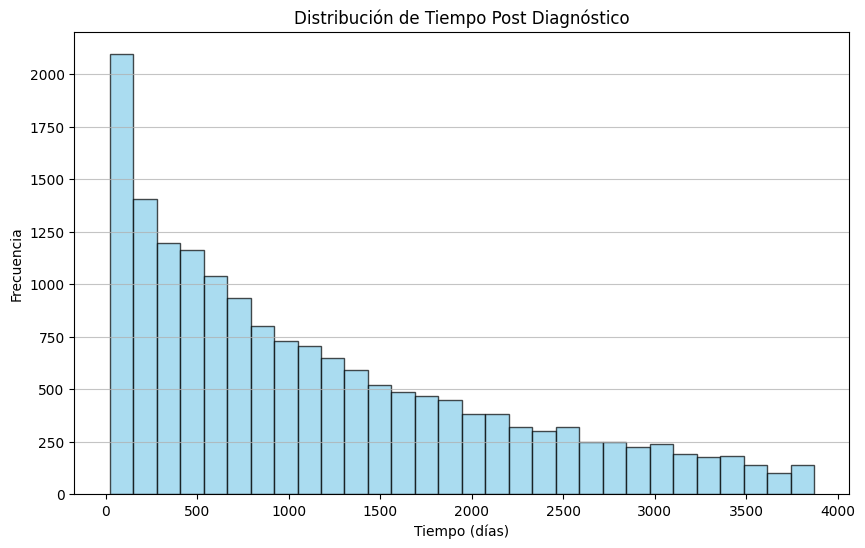

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df5["Tiempo_Post_Diagnostico"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Tiempo Post Diagnóstico')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Voy a intentar eliminar outliers a ver si da mejores resultados


In [ ]:
#99
upper_limit10 = df_morto_2["Tiempo_Post_Diagnostico"].quantile(0.90)
lower_limit10 = df_morto_2["Tiempo_Post_Diagnostico"].quantile(0.10)
print(f"Umbral para el percentil 5%: {lower_limit10} días")
print(f"Umbral para el percentil 99: {upper_limit10} días")

Umbral para el percentil 5%: 67.0 días
Umbral para el percentil 99: 3101.2000000000044 días


In [ ]:
#100
filtered_df10 = df_morto_2[(df_morto_2['Tiempo_Post_Diagnostico'] >= lower_limit10) & (df_morto_2['Tiempo_Post_Diagnostico'] <= upper_limit10)]
print(f"Tamaño original del DataFrame: {df_morto_2.shape[0]} filas")
print(f"Tamaño después de filtrar outliers: {filtered_df10.shape[0]} filas")


Tamaño original del DataFrame: 18695 filas
Tamaño después de filtrar outliers: 14967 filas


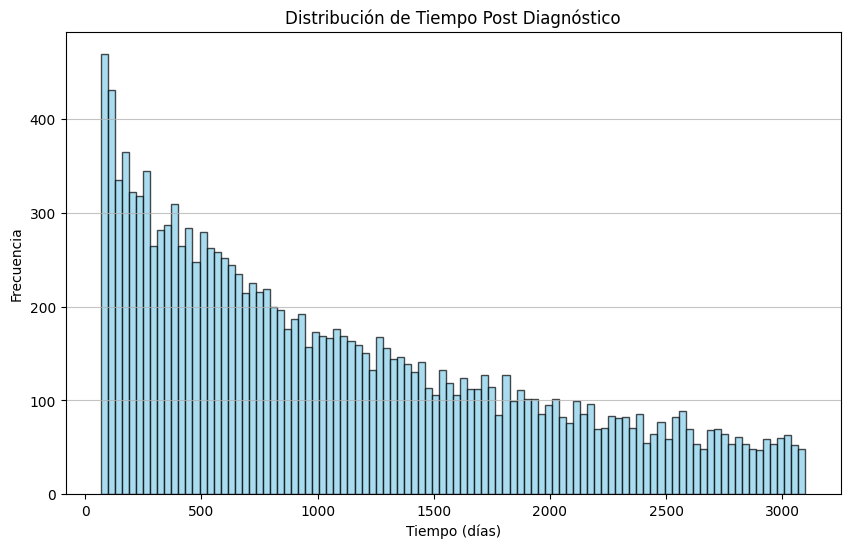

In [ ]:
#101
plt.figure(figsize=(10, 6))
plt.hist(filtered_df10["Tiempo_Post_Diagnostico"], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Tiempo Post Diagnóstico')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

EMPEZAMOS CON EL NUEVO DF FILTRADO CON EL PERCENTIL 10-90 TENIENDO MÁS DE 14.OOO DATOS ES SUFICIENTE (HASTA 10.000 SERÍA ACEPTABLE PARA MI)

In [ ]:
#102
X10 = filtered_df10.drop(columns=['Tiempo_Post_Diagnostico'])  # Variables predictoras
y10 = filtered_df10['Tiempo_Post_Diagnostico']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=42)

In [ ]:
#103
# Identificar columnas categóricas
categorical_cols10 = X10.select_dtypes(include=["object", "category"]).columns

# Diccionario para almacenar los mapeos
factorize_mappings10 = {}

# Combinar X_train y X_test para factorizarlos juntos
X_combined10 = pd.concat([X10_train, X10_test], axis=0)

# Factorizar las columnas categóricas y almacenar los mapeos
for col in categorical_cols:
    X_combined10[col], uniques = pd.factorize(X_combined10[col], sort=True)
    factorize_mappings10[col] = dict(enumerate(uniques))

# Separar nuevamente en X_train y X_test
X10_train = X_combined10.loc[X10_train.index]
X10_test = X_combined10.loc[X10_test.index]

In [ ]:
#104
print("Mapeo de Raca_Color:", factorize_mappings10['Raca_Color'])
print("Mapeo de State_Civil:", factorize_mappings10["State_Civil"])
print("Mapeo de Diagnostic_means:", factorize_mappings10['Diagnostic_means'])
print("Mapeo de Extension:", factorize_mappings10['Extension'])
print("Mapeo de TNM:", factorize_mappings10['TNM'])
print("Mapeo de Morphology_Description:", factorize_mappings10['Morphology_Description'])

Mapeo de Raca_Color: {0: 'AMARELA', 1: 'BRANCO', 2: 'INDÍGENA', 3: 'PARDA', 4: 'PRETA'}
Mapeo de State_Civil: {0: 'CASADO', 1: 'SEPARADO JUDICIALMENTE', 2: 'SOLTEIRO', 3: 'UNIÃO CONSENSUAL', 4: 'VIÚVO'}
Mapeo de Diagnostic_means: {0: 'CITOLOGIA', 1: 'CLÍNICO', 2: 'HISTOLOGIA DA METÁSTASE', 3: 'HISTOLOGIA DO TUMOR PRIMÁRIO', 4: 'MARCADORES TUMORAIS', 5: 'PESQUISA', 6: 'SDO'}
Mapeo de Extension: {0: 'IN SITU', 1: 'LOCALIZADO', 2: 'METÁSTASE'}
Mapeo de TNM: {0: '000', 1: '001', 2: '010', 3: '100', 4: '101', 5: '110', 6: '111', 7: '191', 8: '200', 9: '201', 10: '210', 11: '211', 12: '221', 13: '231', 14: '300', 15: '301', 16: '310', 17: '311', 18: '320', 19: '321', 20: '400', 21: '401', 22: '410', 23: '411', 24: '421', 25: '881', 26: '888', 27: '990', 28: '991', 29: '999'}
Mapeo de Morphology_Description: {0: 'ADENOCARCINOMA', 1: 'CARCINOMA', 2: 'CARCINOMA ADENOESCAMOSO', 3: 'CARCINOMA INDIFERENCIADO', 4: 'CARCINOMA NEUROENDOCRINO', 5: 'CARCINOMA PSEUDOSSARCOMATOSO', 6: 'CARCINOSARCOMA', 7

In [ ]:
#105 RANDOM FOREST CON 2 CARACTERISTICAS

X10_train2 = X10_train[['Extension', 'Morphology_Description']]
X10_test2 = X10_test[['Extension', 'Morphology_Description']]

# Crear y entrenar el modelo

rf_model10 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model10.fit(X10_train2, y10_train)

# Predicciones
y_pred10 = rf_model10.predict(X10_test2)

# Evaluar el modelo
mae = mean_absolute_error(y10_test, y_pred10)
rmse = np.sqrt(mean_squared_error(y10_test, y_pred10))
r2 = r2_score(y10_test, y_pred10)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MAE: 674.3352093515916
RMSE: 807.419308981348
R2: 0.02598363842242357


In [ ]:
#105 optimización (hasta ahora los mejores datos de MAE y RMSE pero mala R2)
param_grid10 = {
    'n_estimators': [50, 100, 200],        # Número de árboles
    'max_depth': [5, 10, 20],             # Profundidad máxima
    'min_samples_split': [2, 5, 10],      # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]         # Muestras mínimas en una hoja
}

# Configurar GridSearchCV
grid_search10 = GridSearchCV(
    estimator=rf_model10,
    param_grid=param_grid10,
    scoring='neg_mean_absolute_error',  # Usar MAE como métrica de evaluación
    cv=3,                               # Validación cruzada (3 folds)
    verbose=2,
    n_jobs=-1                           # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda de hiperparámetros
grid_search10.fit(X10_train2, y10_train)

# Obtener los mejores hiperparámetros
best_params10 = grid_search10.best_params_
print(f"Mejores hiperparámetros: {best_params10}")

# Entrenar el modelo optimizado
best_rf_model10 = grid_search10.best_estimator_

# Predicciones con el modelo optimizado
y_pred10_optimized = best_rf_model10.predict(X10_test2)

# Evaluar el modelo optimizado
mae = mean_absolute_error(y10_test, y_pred10_optimized)
rmse = np.sqrt(mean_squared_error(y10_test, y_pred10_optimized))
r2 = r2_score(y10_test, y_pred10_optimized)

print("\nResultados del modelo optimizado:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Resultados del modelo optimizado:
MAE: 674.2455175888865
RMSE: 807.3209894417954
R2: 0.02622083614230486


In [ ]:
#106 XBOOST

xgb_model10 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Entrenar el modelo
xgb_model10.fit(X10_train, y10_train)

# Predicciones
y_pred_xgb10 = xgb_model10.predict(X10_test)

# Evaluar el modelo
mae_xgb10 = mean_absolute_error(y10_test, y_pred_xgb10)
rmse_xgb10 = np.sqrt(mean_squared_error(y10_test, y_pred_xgb10))
r2_xgb10 = r2_score(y10_test, y_pred_xgb10)

print("Resultados de XGBoost:")
print(f"MAE: {mae_xgb10}")
print(f"RMSE: {rmse_xgb10}")
print(f"R2: {r2_xgb10}")

Resultados de XGBoost:
MAE: 659.2583488127989
RMSE: 796.1160942786134
R2: 0.0530636296852568


In [ ]:
#107
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import ParameterGrid

# Crear DMatrix para XGBoost
dtrain = xgb.DMatrix(X10_train, label=y10_train)
dtest = xgb.DMatrix(X10_test, label=y10_test)

# Definir los hiperparámetros para la búsqueda
param_grid_xgb10 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configuración inicial
best_params = None
best_rmse = float("inf")
best_model = None

# Iterar sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid(param_grid_xgb10):
    params['objective'] = 'reg:squarederror'
    params['eval_metric'] = 'rmse'
    params['seed'] = 42

    # Entrenar usando Cross-Validation
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=300,
        nfold=3,
        early_stopping_rounds=10,
        verbose_eval=False
    )

    # Obtener el mejor RMSE de validación
    mean_rmse = cv_results['test-rmse-mean'].min()
    best_num_boost_round = cv_results['test-rmse-mean'].idxmin()

    # Guardar los mejores parámetros si mejora el RMSE
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_params = params
        best_params['num_boost_round'] = best_num_boost_round

# Entrenar el modelo final con los mejores hiperparámetros
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=best_params['num_boost_round']
)

# Predicciones finales
y_pred_xgb = final_model.predict(dtest)

# Evaluar el modelo final
mae_xgb = mean_absolute_error(y10_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y10_test, y_pred_xgb))
r2_xgb = r2_score(y10_test, y_pred_xgb)

print("\nMejores hiperparámetros:")
print(best_params)

print("\nResultados del modelo XGBoost optimizado:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2: {r2_xgb}")



Mejores hiperparámetros:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42, 'num_boost_round': 77}

Resultados del modelo XGBoost optimizado:
MAE: 658.3154802290535
RMSE: 793.3305972159648
R2: 0.05967842882925989


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:09:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#108


In [ ]:
#109